In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns
import numpy as np

sns.set_theme()
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [2]:
df = pd.read_csv("recolage.tsv", sep="\t")

# convert non numeric values to NAN
df[df == -1] = np.NaN

# multiply correct column to get a percentage
df["accuracy"] = df["accuracy"].multiply(100)

# convert level to number
df = df.replace(
    {
        "easy": 1,
        "medium": 2,
        "hard": 3
    }
)

In [3]:
df

board id     file id        design  level  batch position  accuracy  \
0         173  2422.jsonl   no_feedback      3               1       100   
1         172  2422.jsonl   no_feedback      3               2       100   
2         198  2422.jsonl   no_feedback      3               3       100   
3         115  2422.jsonl   no_feedback      3               4       100   
4         248  2422.jsonl   no_feedback      2               5         0   
..        ...         ...           ...    ...             ...       ...   
635        15  2599.jsonl  show_gripper      1              16       100   
636        10  2599.jsonl  show_gripper      1              17       100   
637        90  2599.jsonl  show_gripper      1              18       100   
638       133  2599.jsonl  show_gripper      3              19       100   
639       186  2599.jsonl  show_gripper      3              20       100   

    target  lag to typing  lag to description  reaction time  n tokens  \
0        I            NaN                  90             10        14   
1        Z            NaN                  64             15        16   
2        Y            NaN                  68             20        15   
3        W            NaN                  43             16        14   
4        Y            NaN                  48             25        10   
..     ...            ...                 ...            ...       ...   
635      L            4.0                  14              7         6   
636      Z            2.0                  11             10         9   
637      V            5.0                  25             12        11   
638      P            4.0                  12              7         8   
639      X            4.0                  11             11         5   

     n adjectives  n adverbs  n nouns  
0               2          0        3  
1               2          0        4  
2               3          0        3  
3               1          0        4  
4               0          0        4  
..            ...        ...      ...  
635             2          0        2  
636             0          0        4  
637             2          0        2  
638             1          0        3  
639             2          1        1  

[640 rows x 14 columns]

## PLOT EACH VARIABLE (LINE + BOXPLOT)

/tmp/ipykernel_2062781/2974985066.py:22: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (name, data) in enumerate(to_plot):


<Figure size 2700x750 with 0 Axes>

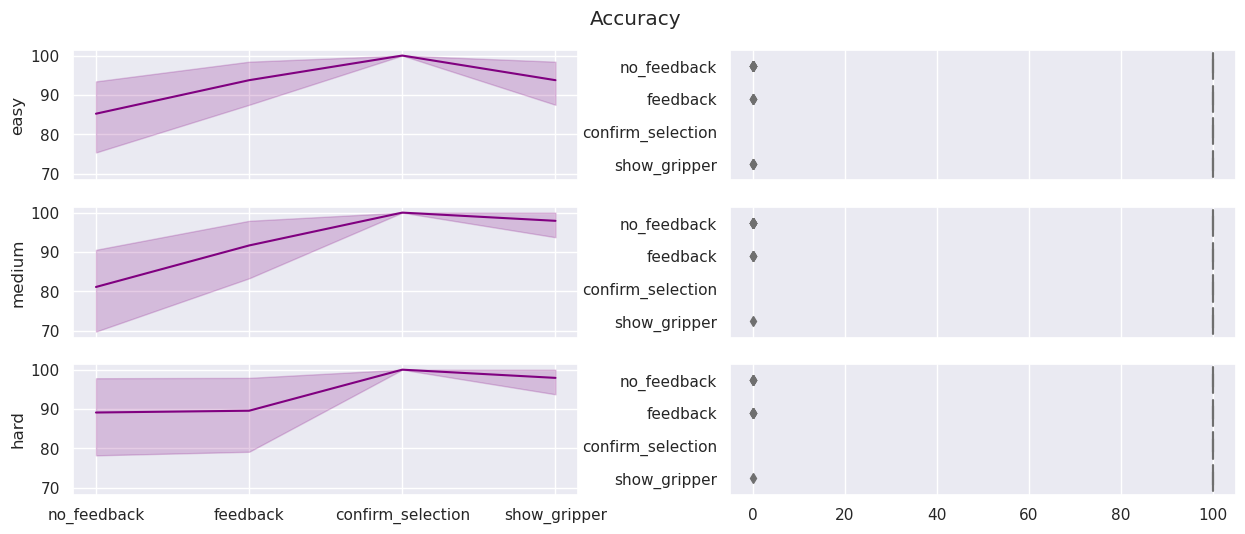

/tmp/ipykernel_2062781/2974985066.py:22: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (name, data) in enumerate(to_plot):


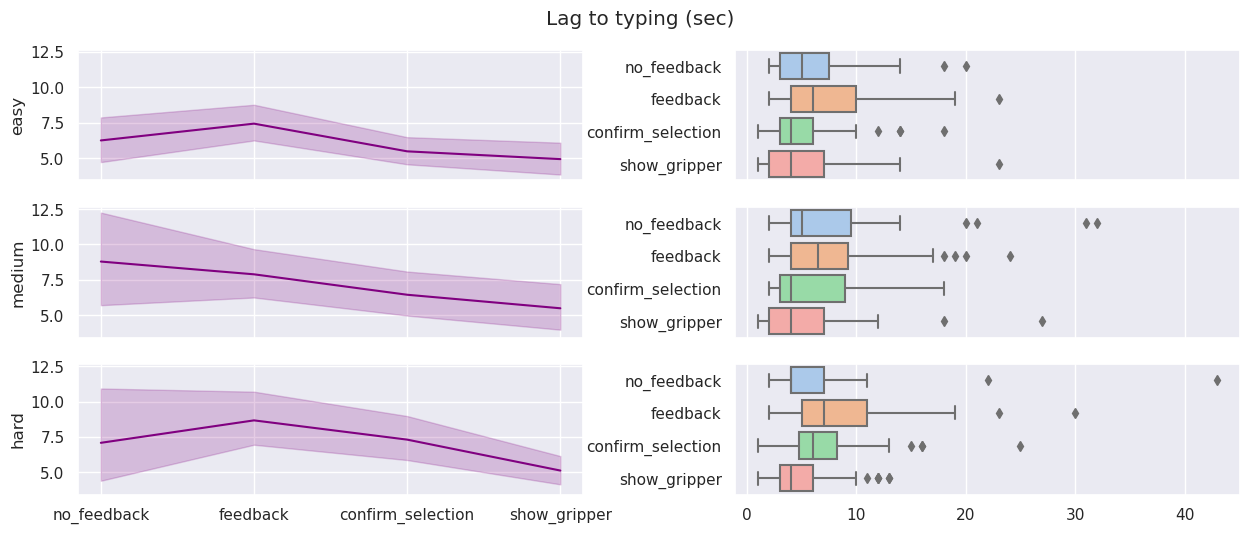

/tmp/ipykernel_2062781/2974985066.py:22: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (name, data) in enumerate(to_plot):


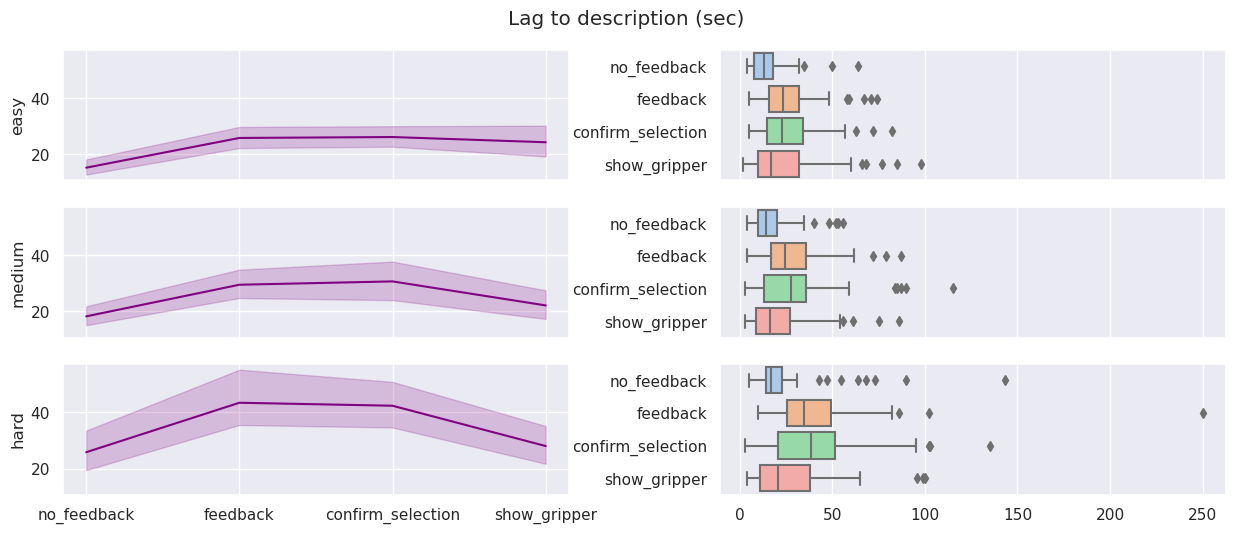

/tmp/ipykernel_2062781/2974985066.py:22: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (name, data) in enumerate(to_plot):


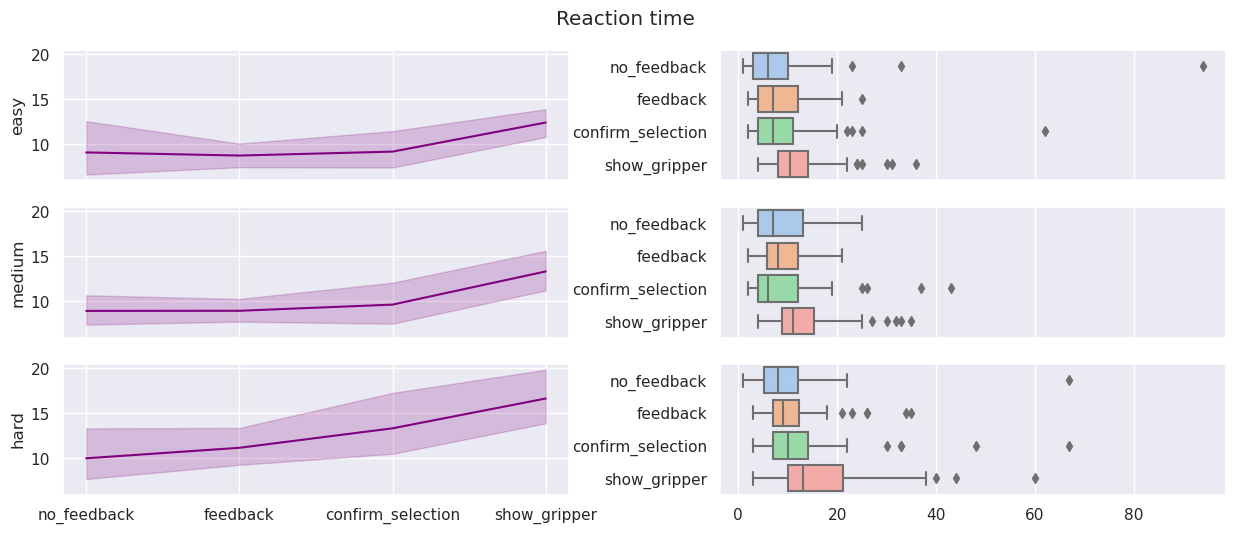

/tmp/ipykernel_2062781/2974985066.py:22: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (name, data) in enumerate(to_plot):


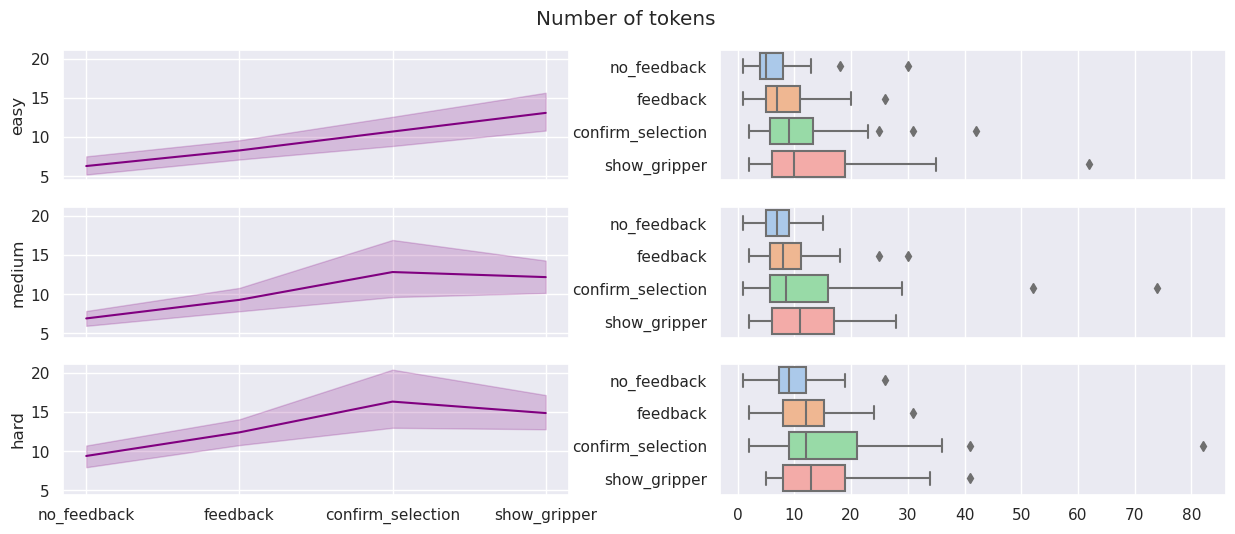

/tmp/ipykernel_2062781/2974985066.py:22: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (name, data) in enumerate(to_plot):


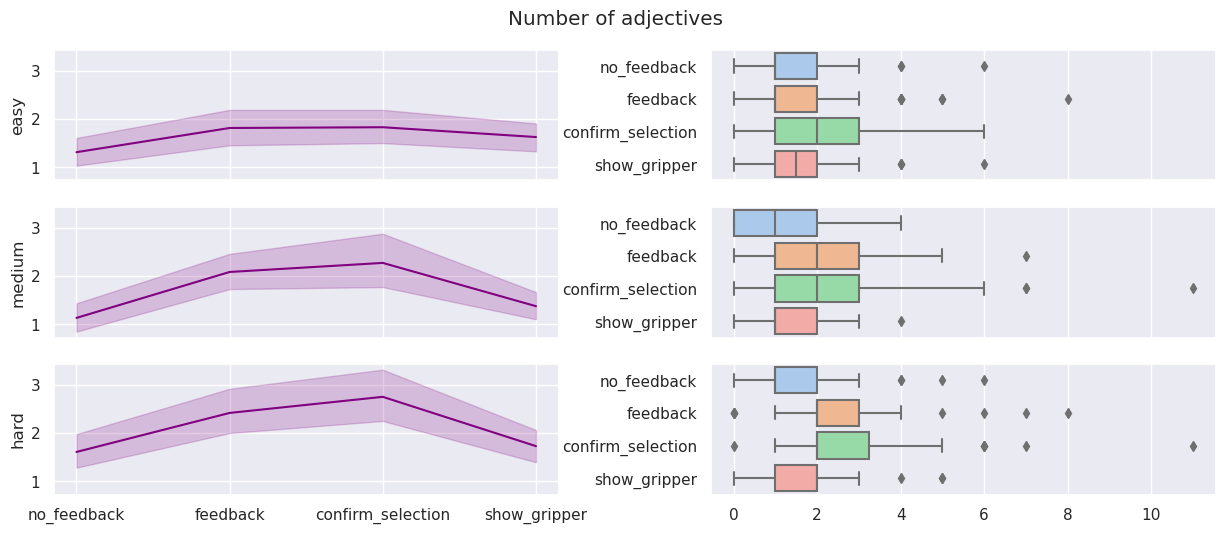

/tmp/ipykernel_2062781/2974985066.py:22: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (name, data) in enumerate(to_plot):


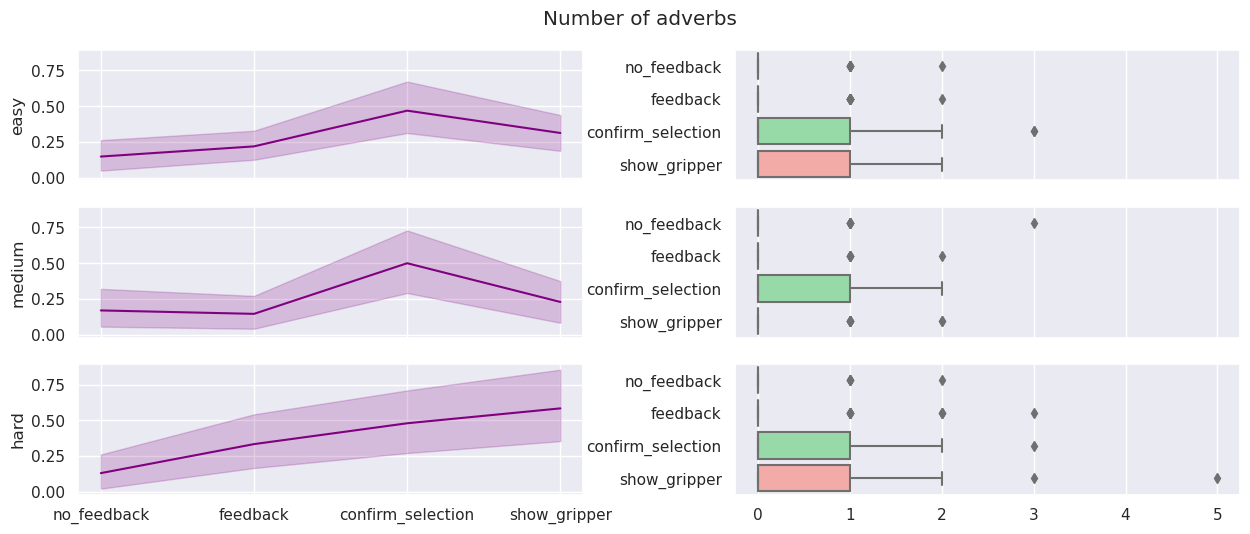

/tmp/ipykernel_2062781/2974985066.py:22: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (name, data) in enumerate(to_plot):


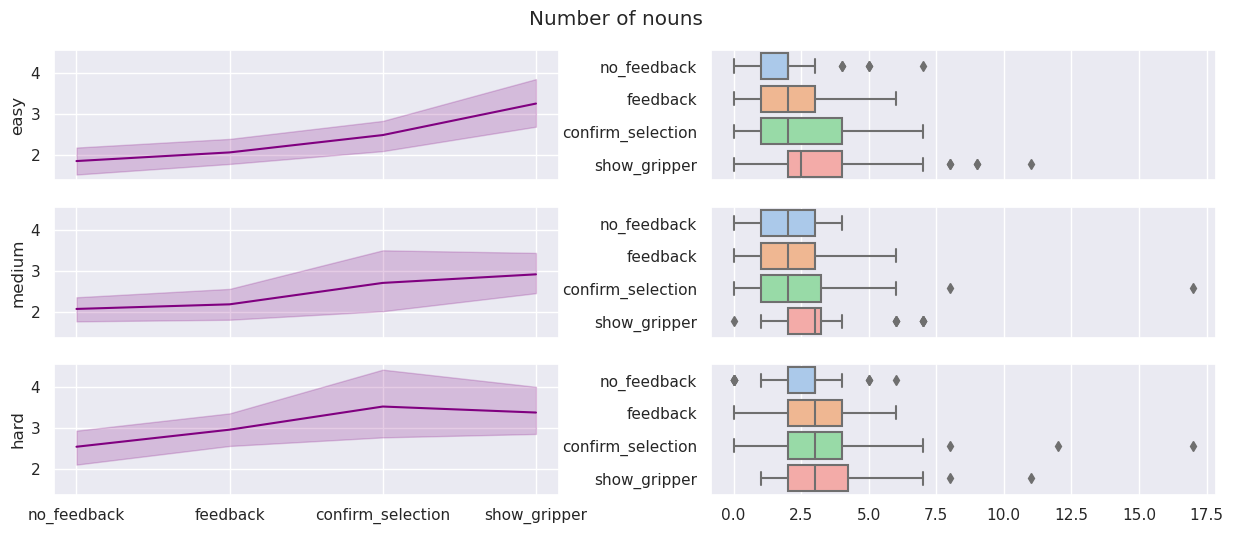

In [5]:
to_plot = (
    df[[i for i in df.columns if i not in {"board id", "batch position"}]]
    .drop(columns=["file id", "target"])
    .groupby(["level"])
)


figure(figsize=(18, 5), dpi=150)
level_names = ["easy", "medium", "hard"]


titles = {
    "lag to typing": "lag to typing (sec)"
}


for item in ["accuracy", "lag to typing", "lag to description", "reaction time", "n tokens", "n adjectives", "n adverbs", "n nouns"]:
    fig, axs = plt.subplots(3, 2, sharex='col', sharey="col", figsize=(15, 5))
    
    plt.subplots_adjust(top = 0.9, bottom=0.01, hspace=0.2, wspace=0.3)
    
    for i, (name, data) in enumerate(to_plot):
        img = sns.lineplot(data.set_index("design")[item], ax=axs[i, 0], color="purple")
        img.set(ylabel=level_names[i], xlabel=None)
        
        img = sns.boxplot(data=data, y="design", x=item, orient="h", ax=axs[i, 1], palette="pastel")
        img.set(ylabel=None, xlabel=None)

    if item.startswith("lag"):
        item += " (sec)"
    elif item.startswith("n "):
        item = item.split(" ")[-1]
        item = f"number of {item}"
    
    fig.suptitle(item.capitalize())
    plt.show()

## TABLES WITH MEAN VALUES

### TABLE 1: by difficulty levels across all designs

In [6]:
# get mean values across all design based on difficoulty level

(
    df[[i for i in df.columns if i not in {"board id", "batch position"}]]
    .groupby("level")
    .mean(numeric_only=True)
).T

level                       1          2          3
accuracy            93.280632  92.385787  94.210526
lag to typing        5.956522   6.948905   6.956835
lag to description  23.015810  25.000000  35.021053
reaction time        9.857708  10.167513  12.815789
n tokens             9.636364  10.203046  13.278947
n adjectives         1.648221   1.700508   2.131579
n adverbs            0.288538   0.258883   0.384211
n nouns              2.418972   2.461929   3.105263

#### latex table

In [7]:
print((
    df[[i for i in df.columns if i not in {"board id", "batch position"}]]
    .groupby("level")
    .mean(numeric_only=True)
).T.round(2).to_latex())

\begin{tabular}{lrrr}
\toprule
level &      1 &      2 &      3 \\
\midrule
accuracy           &  93.28 &  92.39 &  94.21 \\
lag to typing      &   5.96 &   6.95 &   6.96 \\
lag to description &  23.02 &  25.00 &  35.02 \\
reaction time      &   9.86 &  10.17 &  12.82 \\
n tokens           &   9.64 &  10.20 &  13.28 \\
n adjectives       &   1.65 &   1.70 &   2.13 \\
n adverbs          &   0.29 &   0.26 &   0.38 \\
n nouns            &   2.42 &   2.46 &   3.11 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2062781/3826066854.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  ).T.round(2).to_latex())


## TABLE 2: by design across difficulty levels

In [8]:
# get mean values across all difficoulty level based on design
(
    df[[i for i in df.columns if i not in {"board id", "batch position", "level"}]]
    .groupby("design")
    .mean(numeric_only=True)
).T[["no_feedback", "feedback", "confirm_selection", "show_gripper"]]

design              no_feedback   feedback  confirm_selection  show_gripper
accuracy              85.000000  91.875000         100.000000     96.250000
lag to typing          7.259259   7.941667           6.316667      5.151079
lag to description    19.300000  32.250000          32.418750     24.793750
reaction time          9.293750   9.525000          10.556250     13.950000
n tokens               7.393750   9.818750          13.018750     13.337500
n adjectives           1.337500   2.075000           2.237500      1.581250
n adverbs              0.150000   0.231250           0.481250      0.368750
n nouns                2.125000   2.368750           2.862500      3.187500

### latex

In [9]:
# get mean values across all difficoulty level based on design

print((
    df[[i for i in df.columns if i not in {"board id", "batch position", "level"}]]
    .groupby("design")
    .mean(numeric_only=True)
).T[["no_feedback", "feedback", "confirm_selection", "show_gripper"]].round(2).to_latex())

\begin{tabular}{lrrrr}
\toprule
design &  no\_feedback &  feedback &  confirm\_selection &  show\_gripper \\
\midrule
accuracy           &        85.00 &     91.88 &             100.00 &         96.25 \\
lag to typing      &         7.26 &      7.94 &               6.32 &          5.15 \\
lag to description &        19.30 &     32.25 &              32.42 &         24.79 \\
reaction time      &         9.29 &      9.52 &              10.56 &         13.95 \\
n tokens           &         7.39 &      9.82 &              13.02 &         13.34 \\
n adjectives       &         1.34 &      2.08 &               2.24 &          1.58 \\
n adverbs          &         0.15 &      0.23 &               0.48 &          0.37 \\
n nouns            &         2.12 &      2.37 &               2.86 &          3.19 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2062781/4229368276.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  ).T[["no_feedback", "feedback", "confirm_selection", "show_gripper"]].round(2).to_latex())


## TABLE 3: by design and difficulty level

In [10]:
# get mean values across all difficoulty level based on design

(
    df[[i for i in df.columns if i not in {"board id", "batch position"}]]
    .groupby(["design", "level"])
    .mean(numeric_only=True)
).round(2).T[["no_feedback", "feedback", "confirm_selection", "show_gripper"]]

design             no_feedback               feedback                \
level                        1      2      3        1      2      3   
accuracy                 85.25  81.13  89.13    93.75  91.67  89.58   
lag to typing             6.25   8.79   7.08     7.44   7.89   8.67   
lag to description       15.28  18.26  25.83    25.88  29.54  43.46   
reaction time             9.08   8.92  10.00     8.73   8.94  11.17   
n tokens                  6.31   6.91   9.39     8.30   9.27  12.40   
n adjectives              1.31   1.13   1.61     1.81   2.08   2.42   
n adverbs                 0.15   0.17   0.13     0.22   0.15   0.33   
n nouns                   1.85   2.08   2.54     2.06   2.19   2.96   

design             confirm_selection                 show_gripper         \
level                              1       2       3            1      2   
accuracy                      100.00  100.00  100.00        93.75  97.92   
lag to typing                   5.48    6.44    7.31         4.93   5.49   
lag to description             26.20   30.73   42.40        24.34  22.17   
reaction time                   9.17    9.62   13.33        12.41  13.31   
n tokens                       10.70   12.81   16.31        13.08  12.17   
n adjectives                    1.83    2.27    2.75         1.62   1.38   
n adverbs                       0.47    0.50    0.48         0.31   0.23   
n nouns                         2.48    2.71    3.52         3.25   2.92   

design                     
level                   3  
accuracy            97.92  
lag to typing        5.12  
lag to description  28.02  
reaction time       16.65  
n tokens            14.85  
n adjectives         1.73  
n adverbs            0.58  
n nouns              3.38

### latex

In [11]:
# get mean values across all difficoulty level based on design

print((
    df[[i for i in df.columns if i not in {"board id", "batch position"}]]
    .groupby(["design", "level"])
    .mean(numeric_only=True)
).round(2).T[["no_feedback", "feedback", "confirm_selection", "show_gripper"]].to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
design & \multicolumn{3}{l}{no\_feedback} & \multicolumn{3}{l}{feedback} & \multicolumn{3}{l}{confirm\_selection} & \multicolumn{3}{l}{show\_gripper} \\
level &           1 &      2 &      3 &        1 &      2 &      3 &                 1 &       2 &       3 &            1 &      2 &      3 \\
\midrule
accuracy           &       85.25 &  81.13 &  89.13 &    93.75 &  91.67 &  89.58 &            100.00 &  100.00 &  100.00 &        93.75 &  97.92 &  97.92 \\
lag to typing      &        6.25 &   8.79 &   7.08 &     7.44 &   7.89 &   8.67 &              5.48 &    6.44 &    7.31 &         4.93 &   5.49 &   5.12 \\
lag to description &       15.28 &  18.26 &  25.83 &    25.88 &  29.54 &  43.46 &             26.20 &   30.73 &   42.40 &        24.34 &  22.17 &  28.02 \\
reaction time      &        9.08 &   8.92 &  10.00 &     8.73 &   8.94 &  11.17 &              9.17 &    9.62 &   13.33 &        12.41 &  13.31 &  16.65 \\
n tokens           &        6.3

/tmp/ipykernel_2062781/432490664.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  ).round(2).T[["no_feedback", "feedback", "confirm_selection", "show_gripper"]].to_latex())


## plot all variables based on difficulty level across all designs

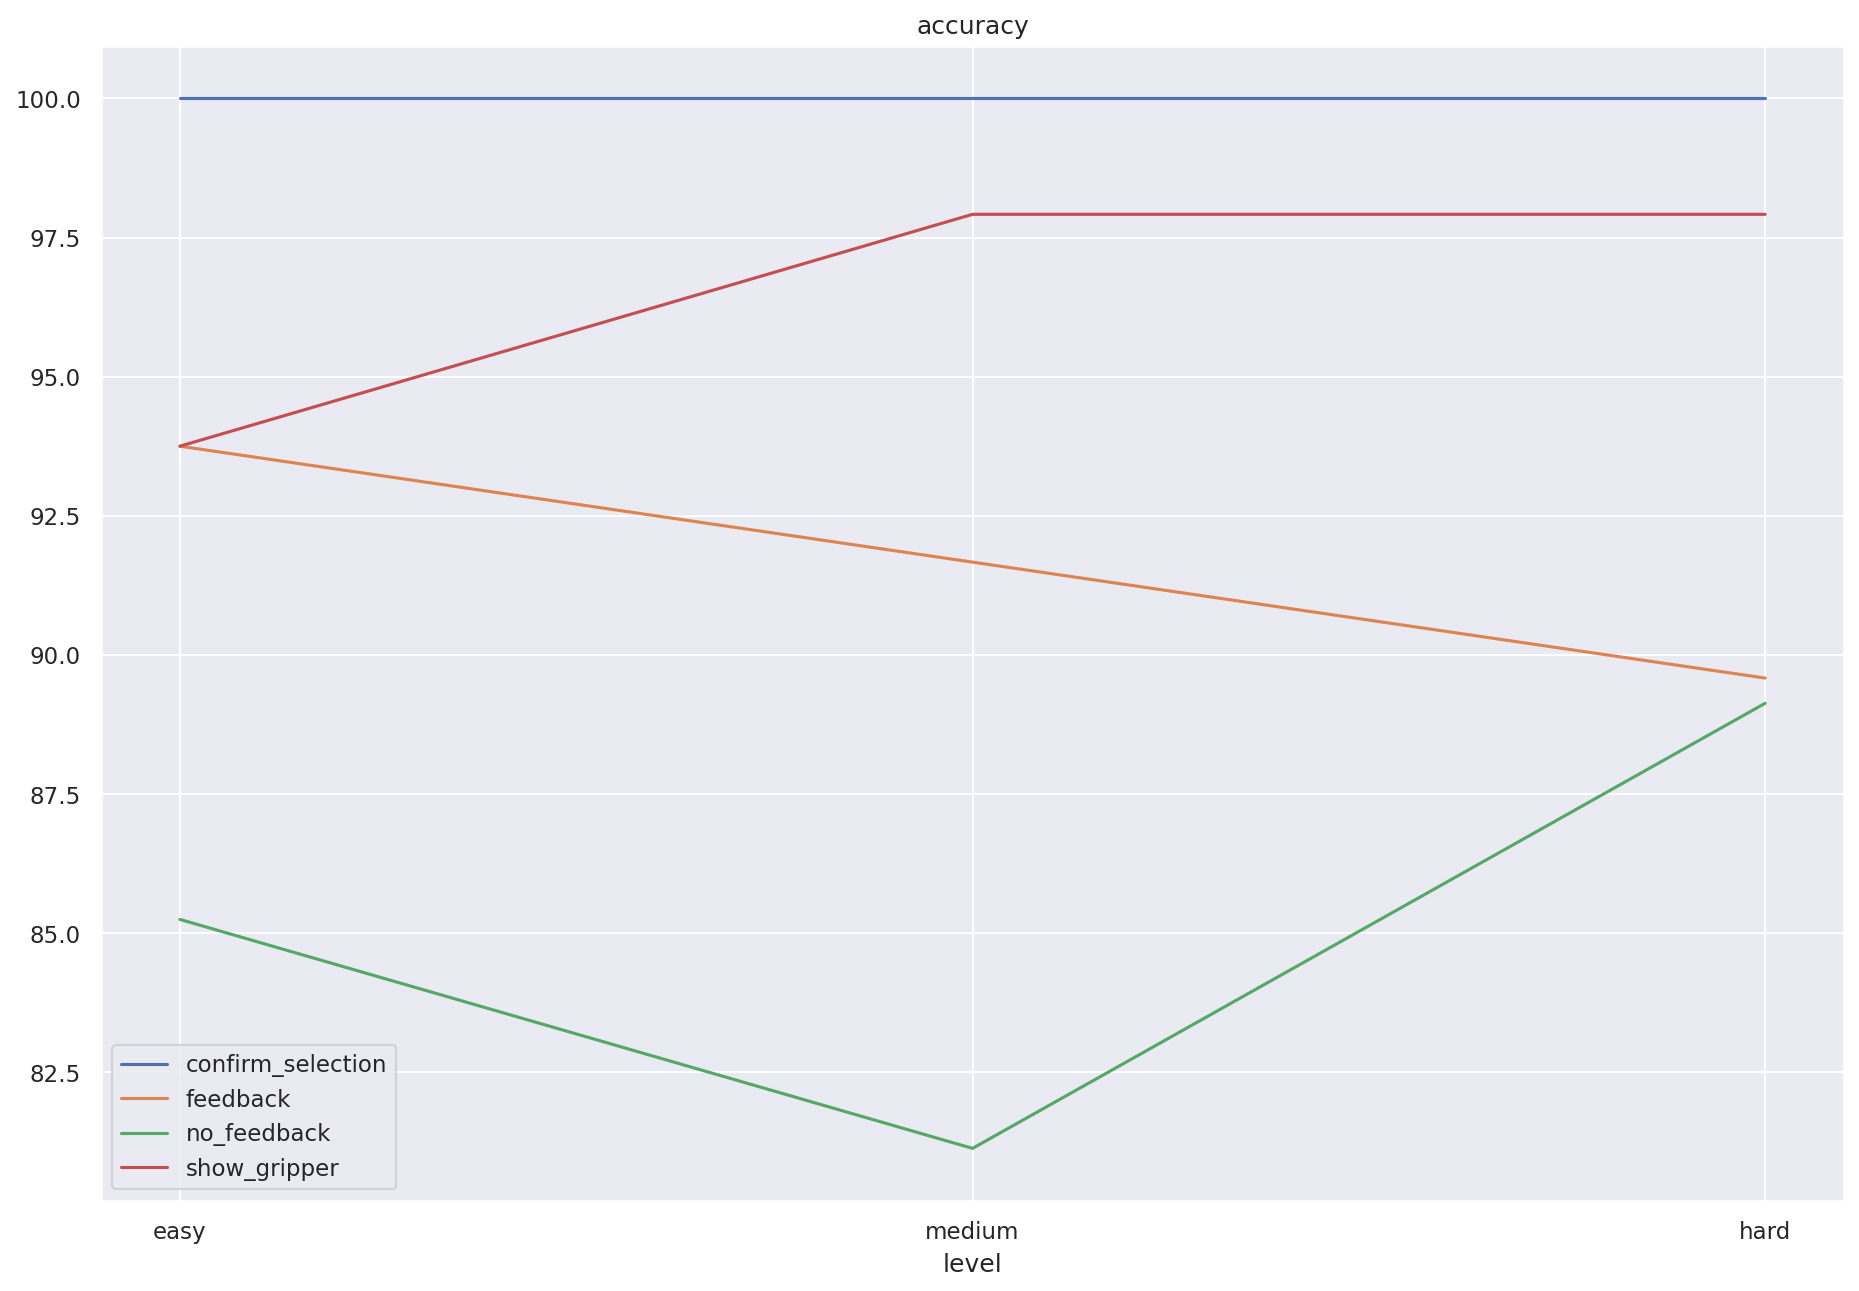

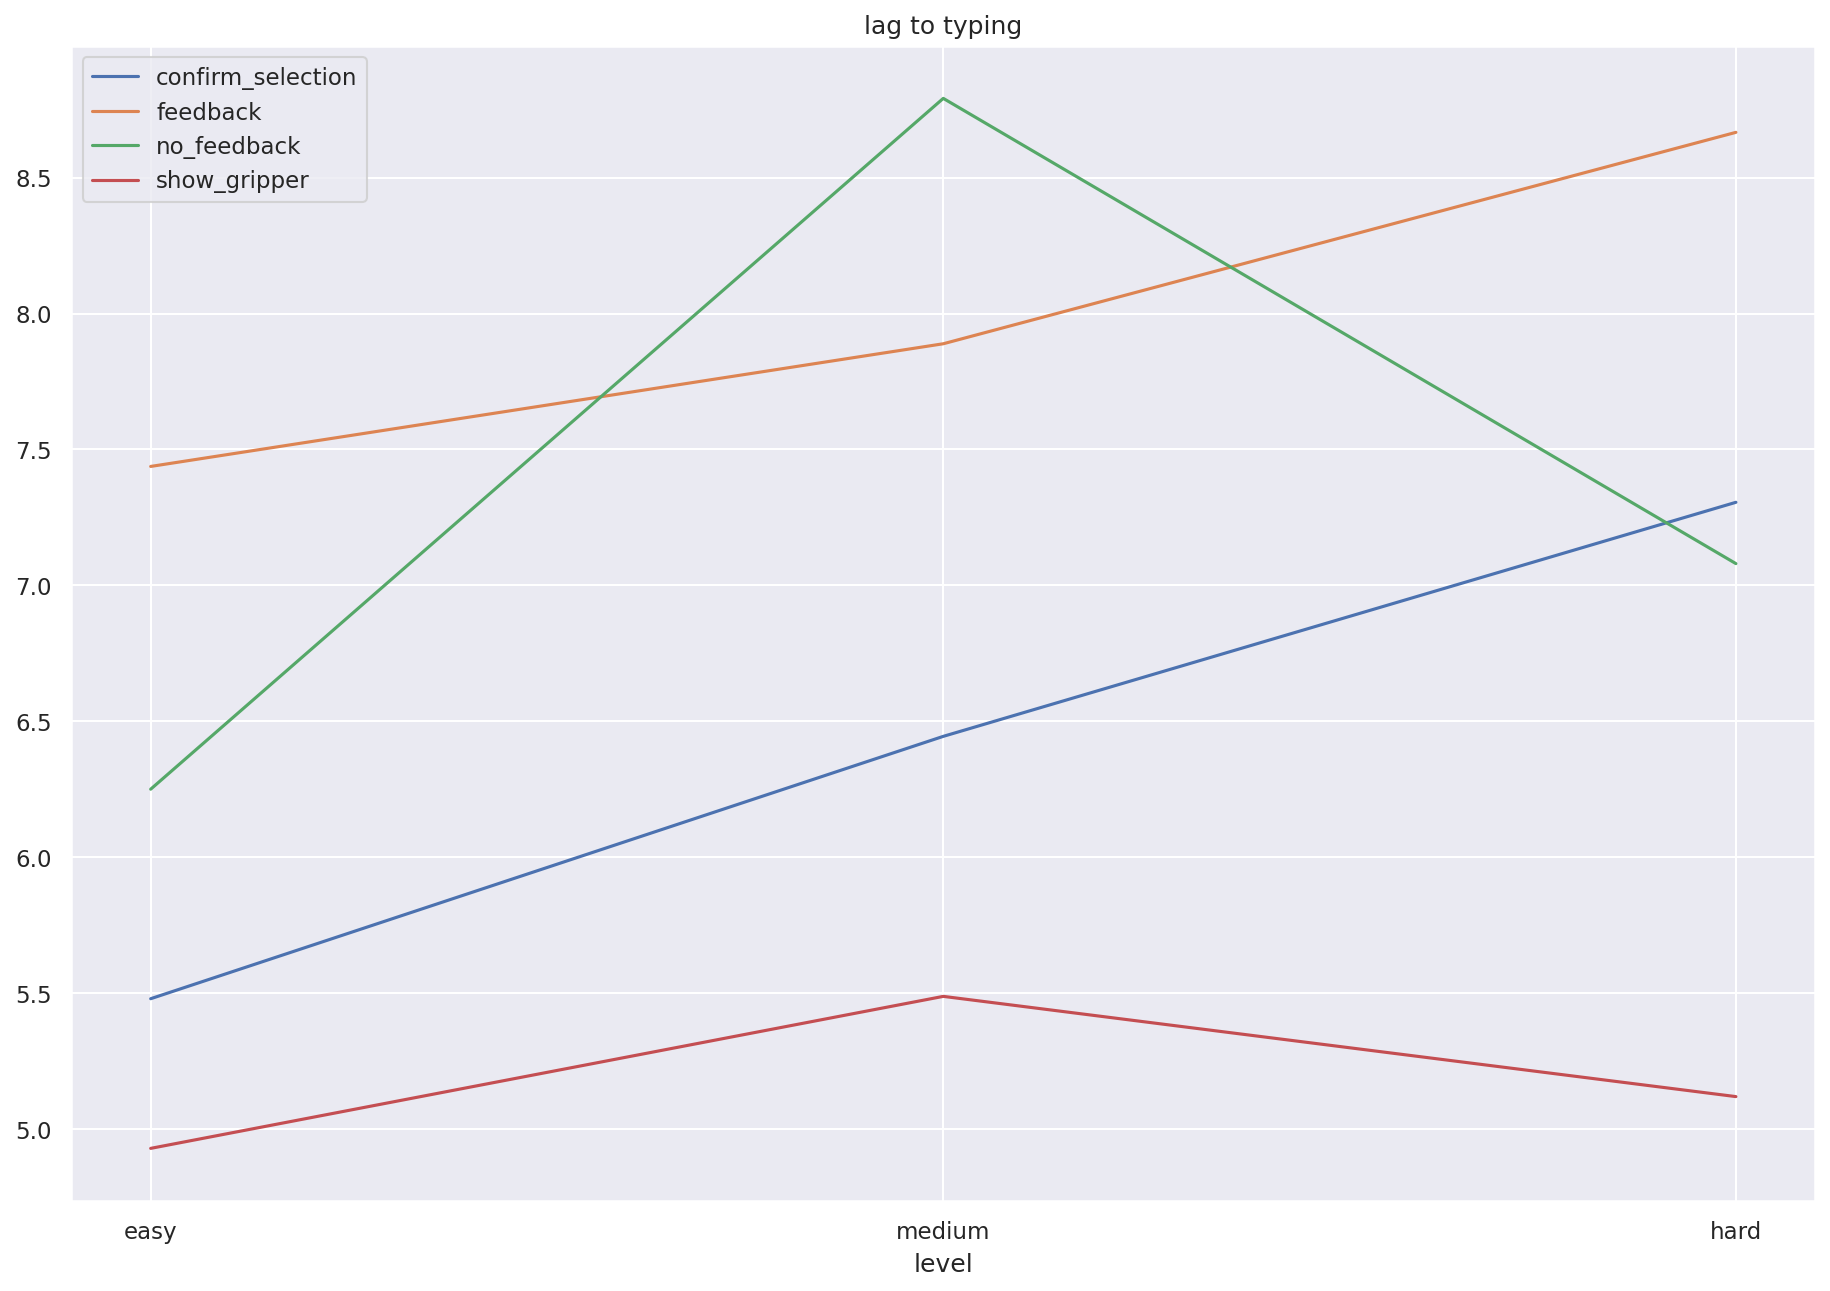

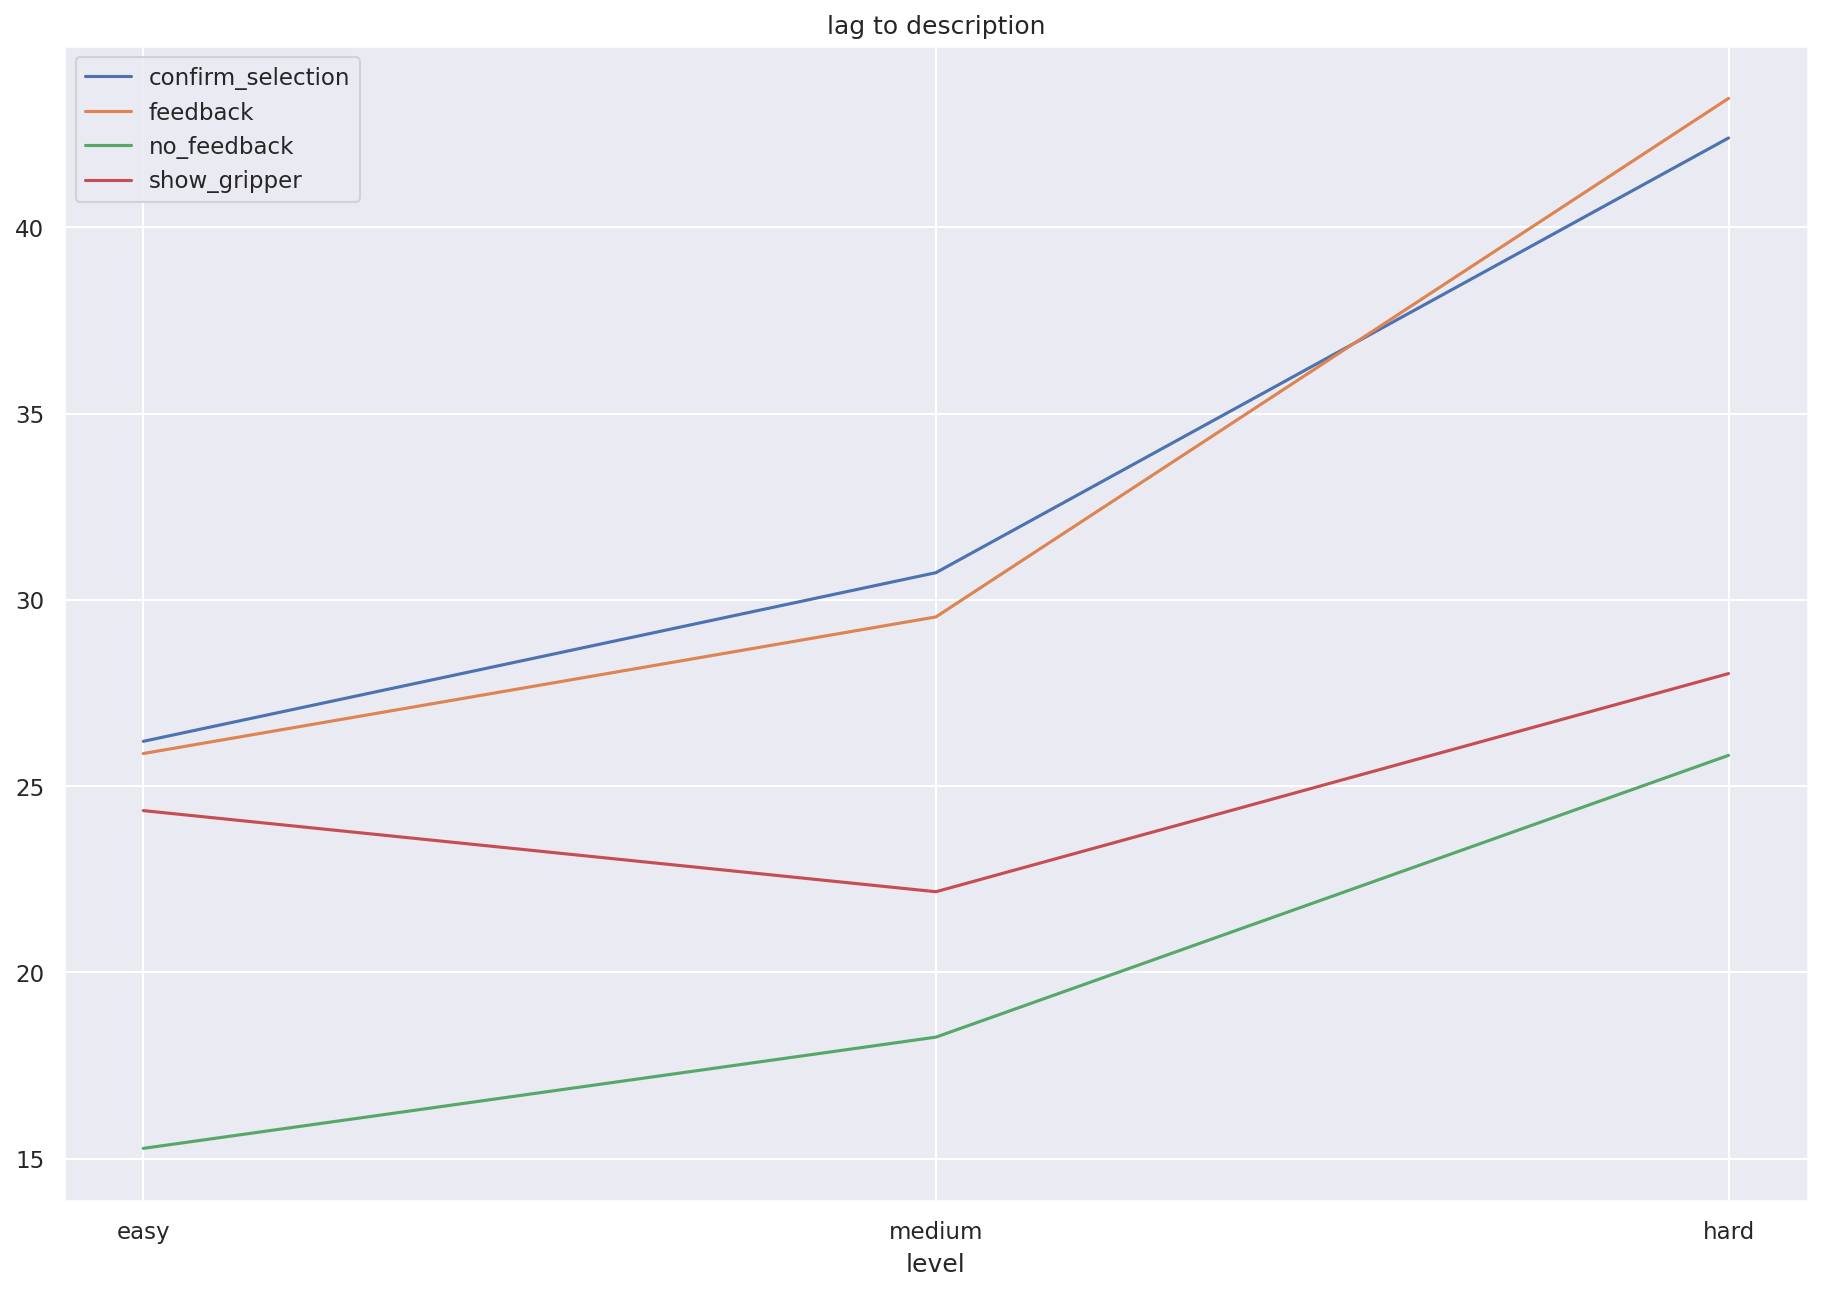

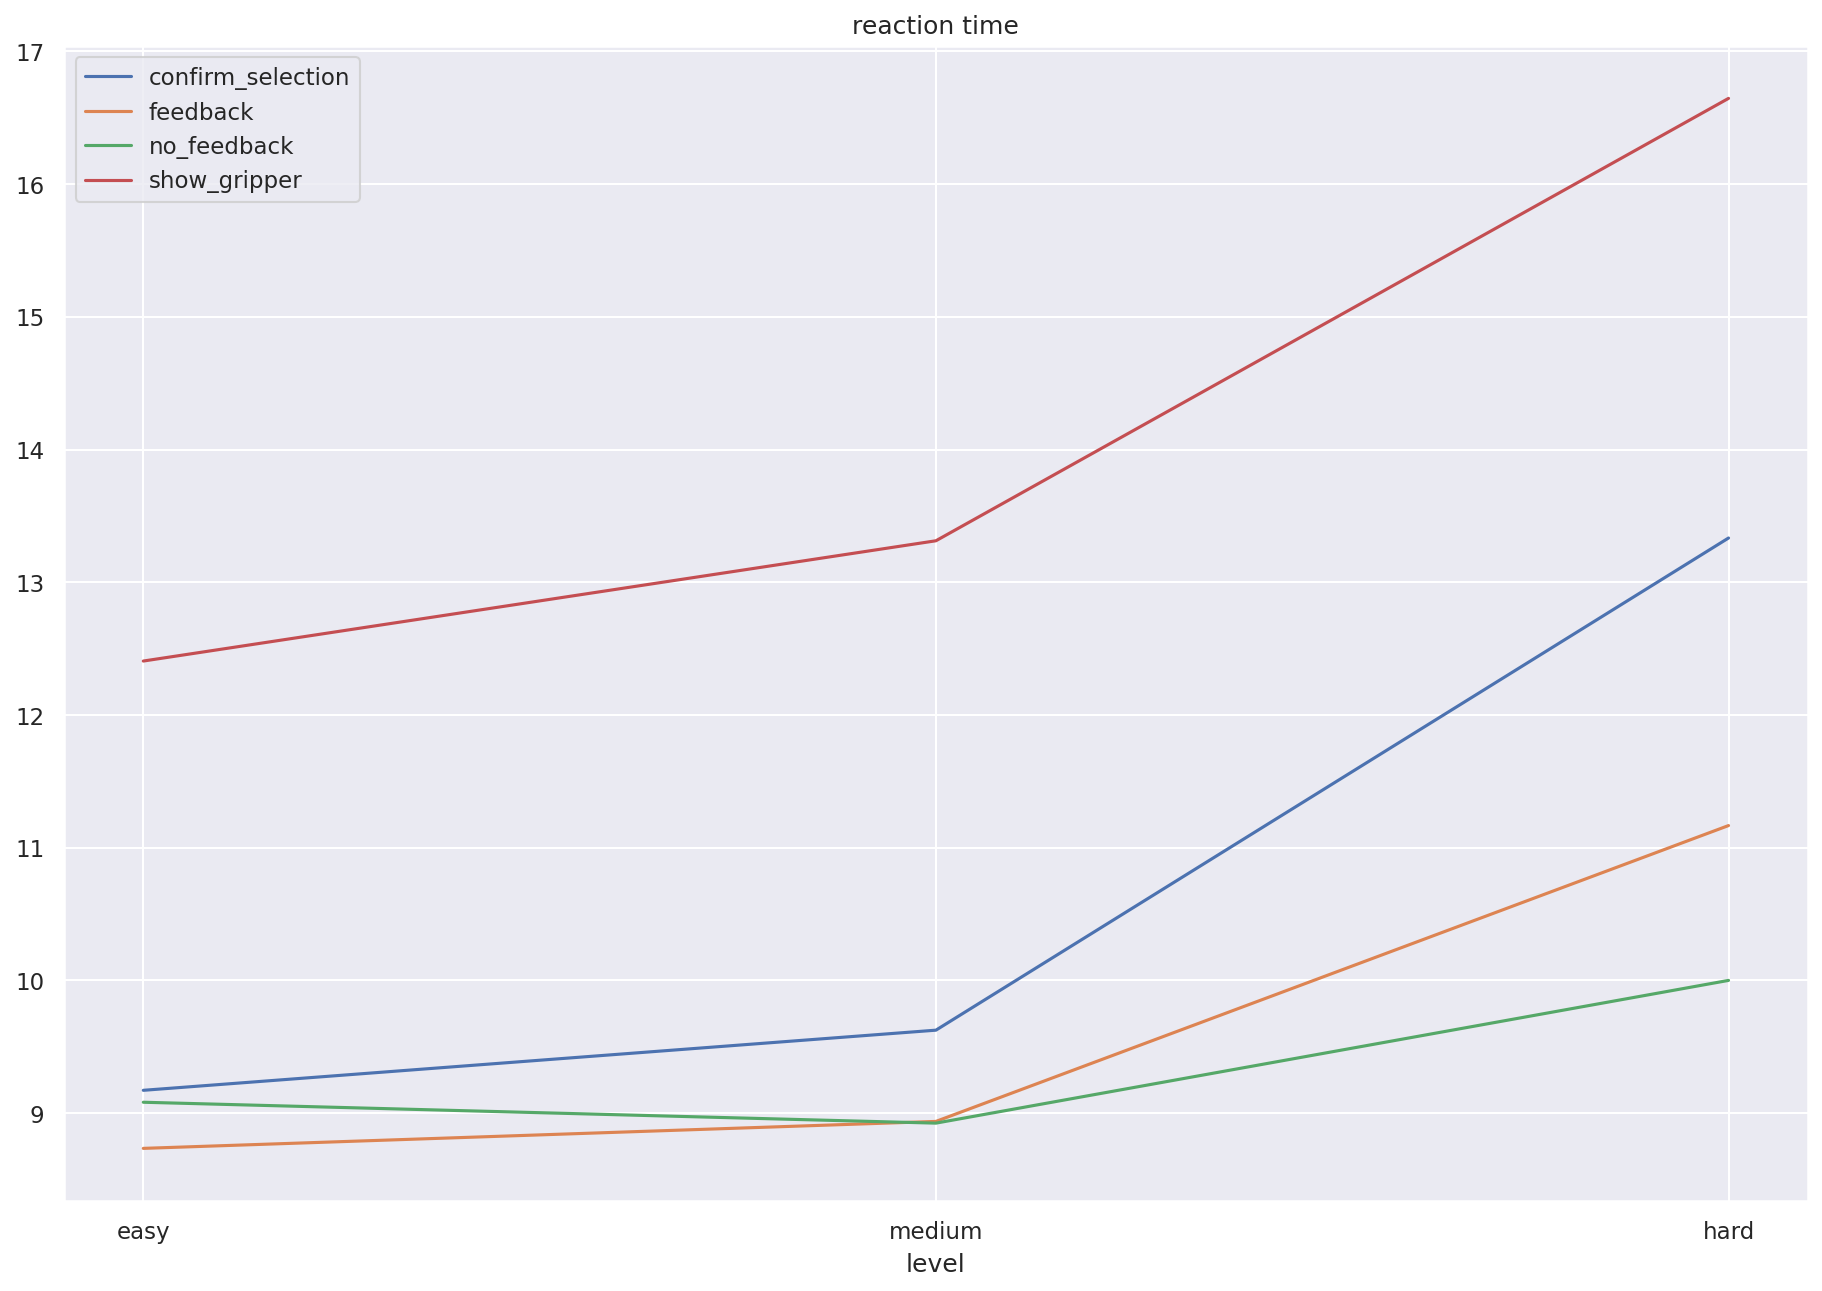

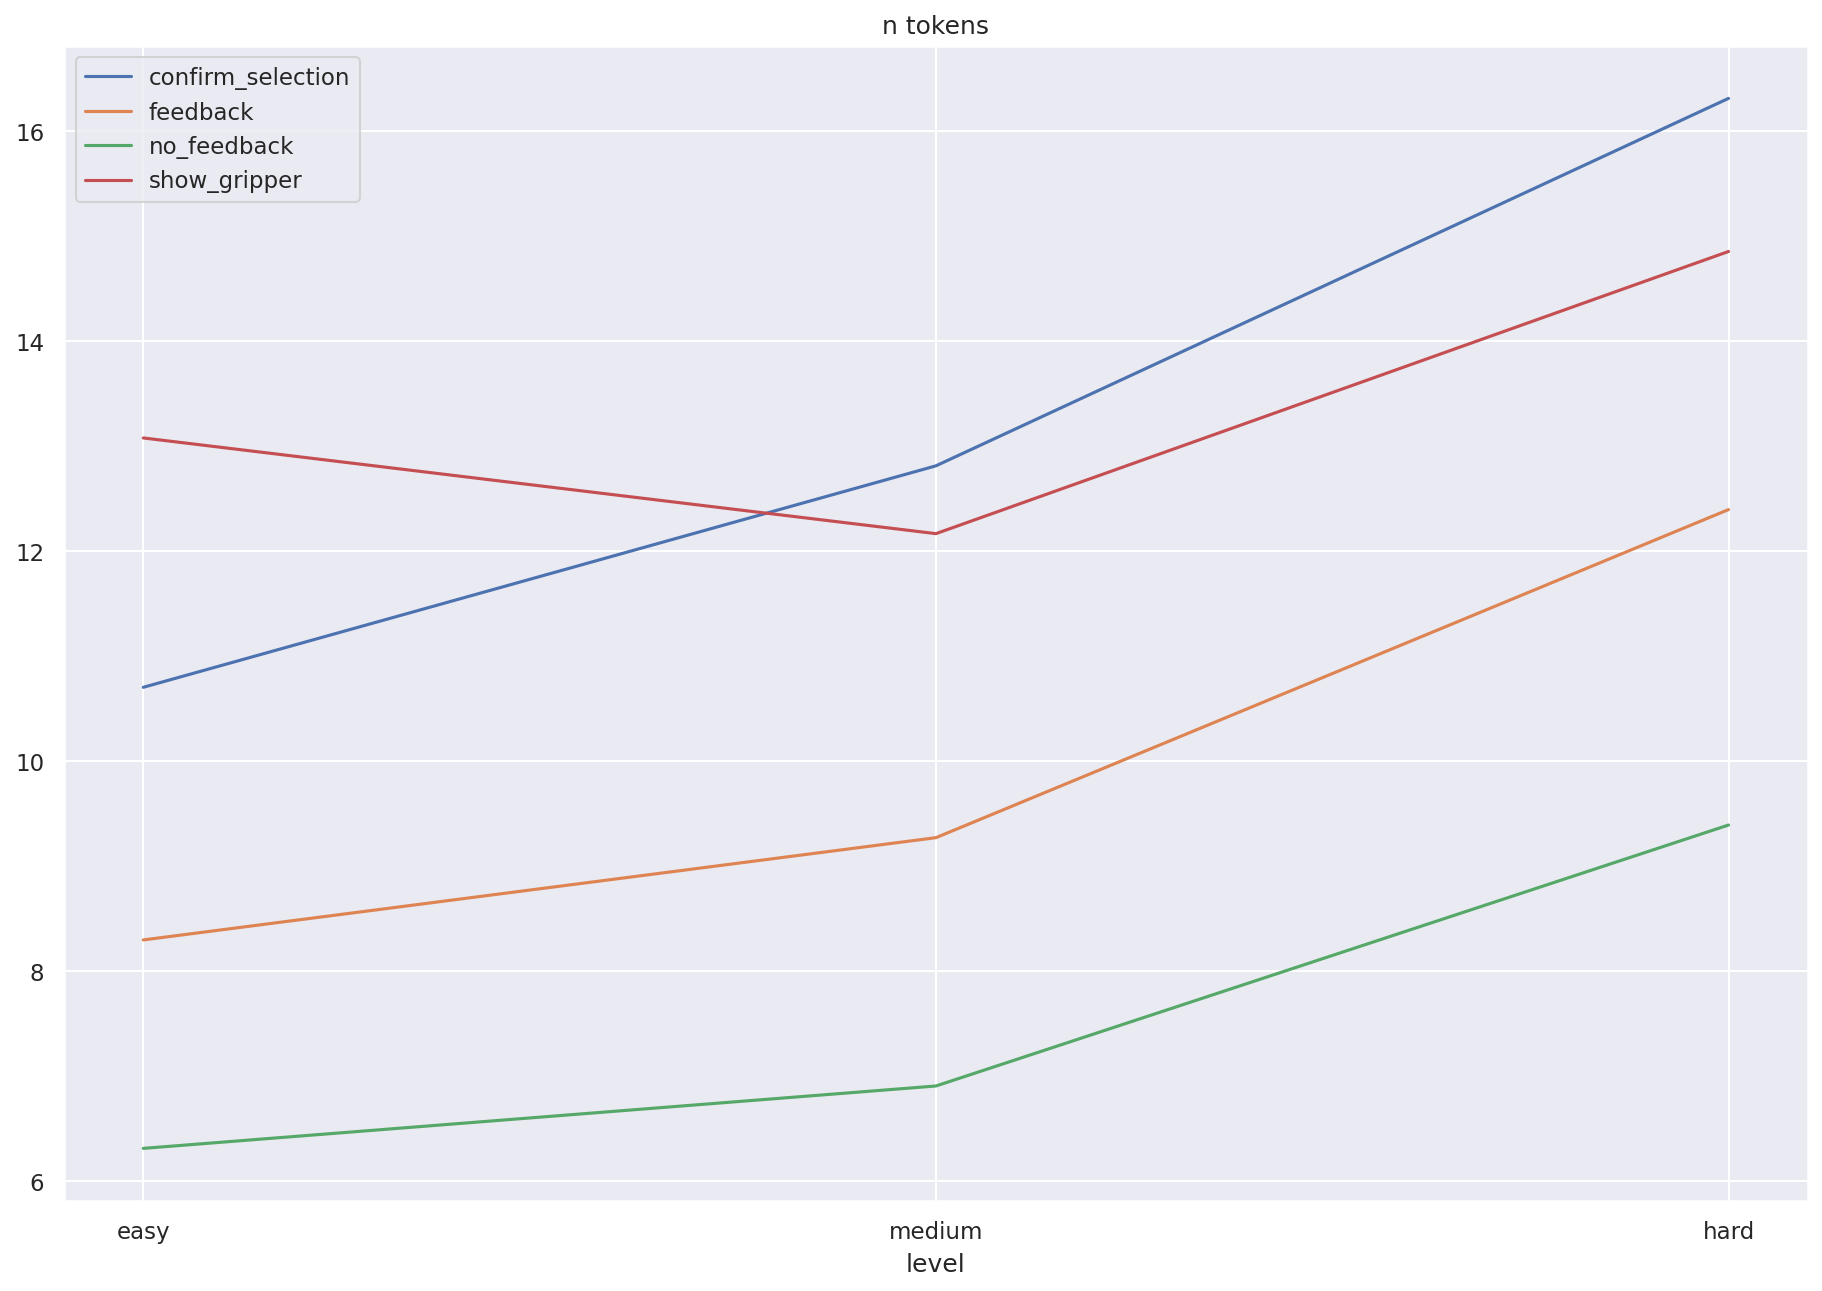

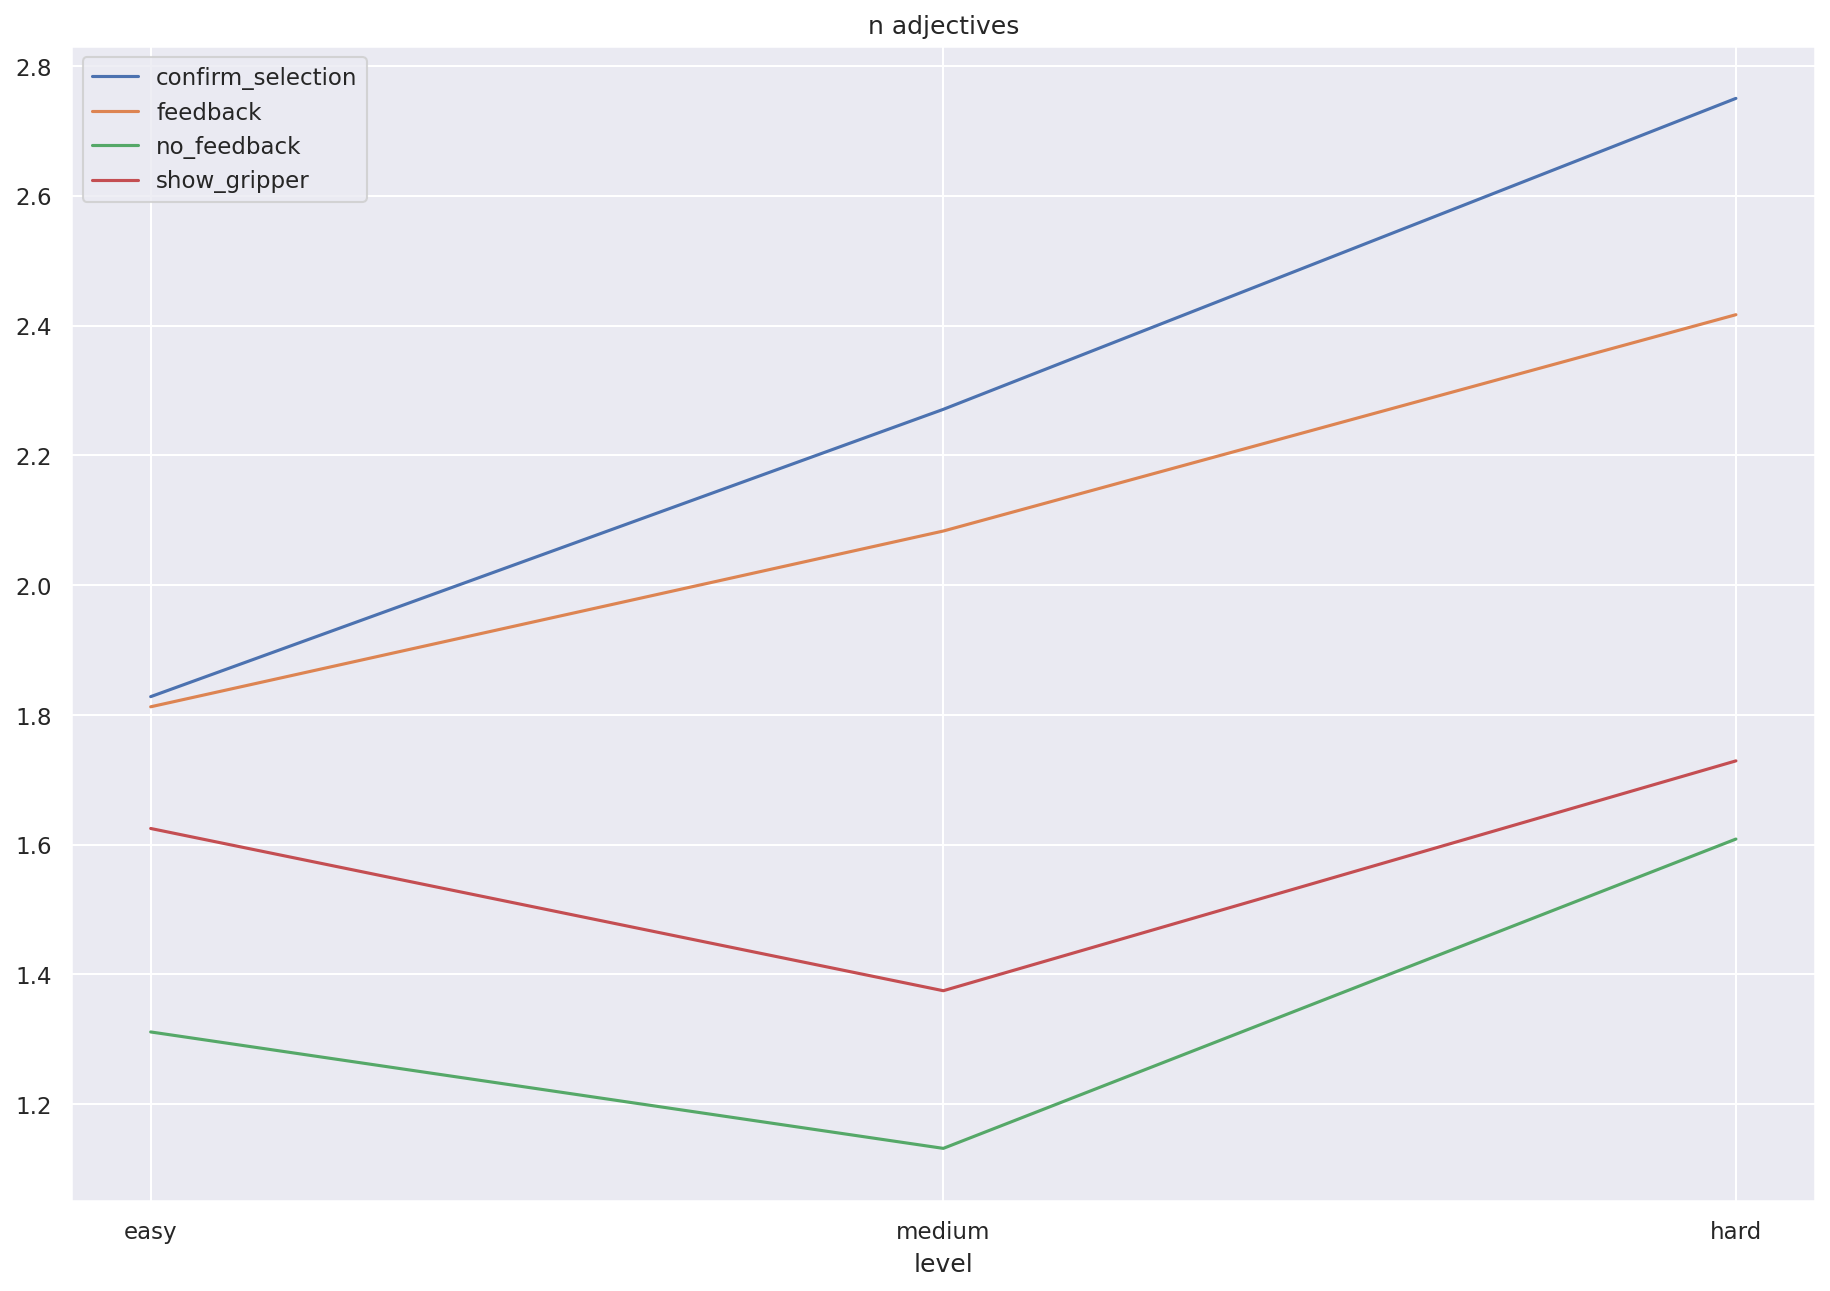

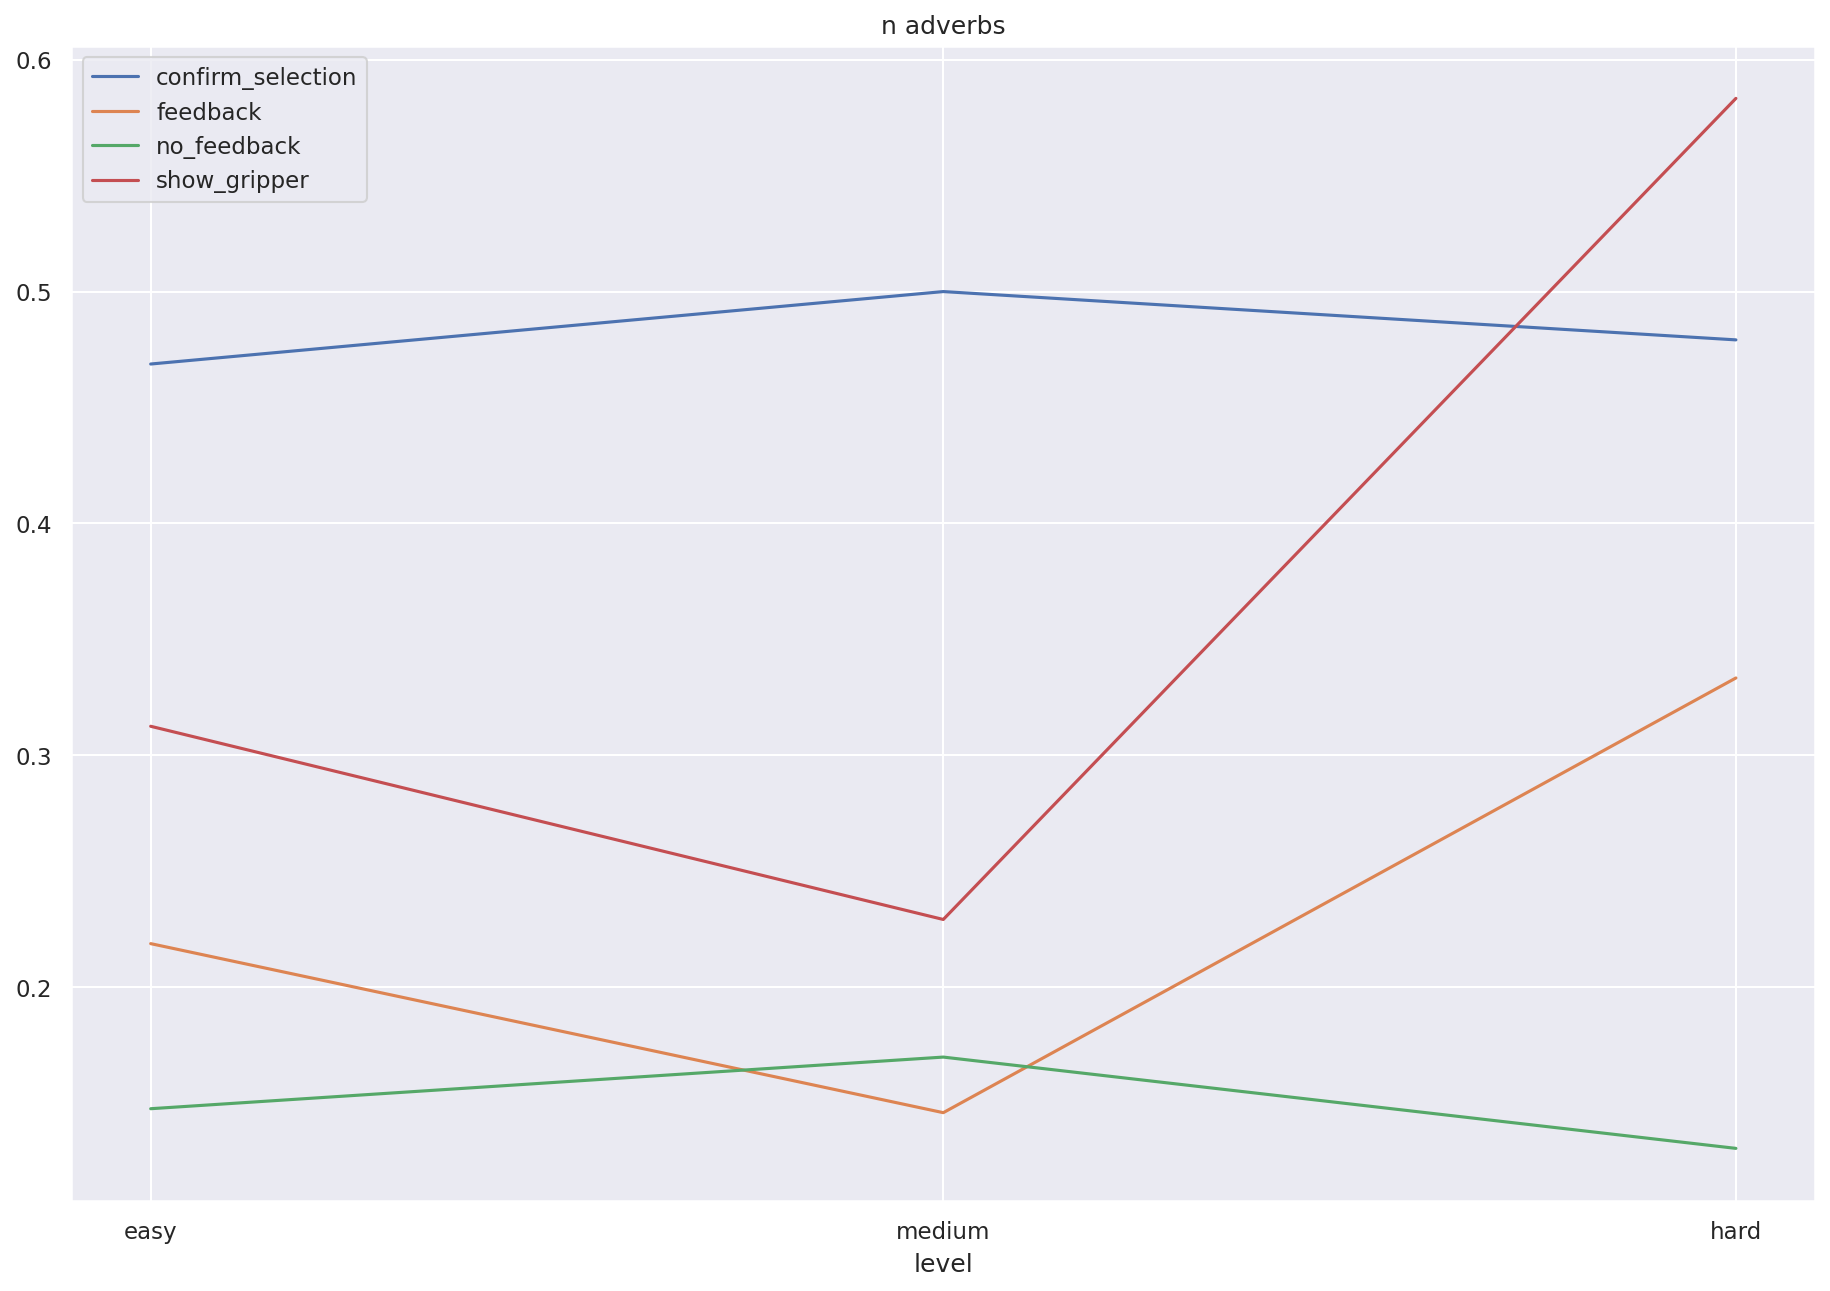

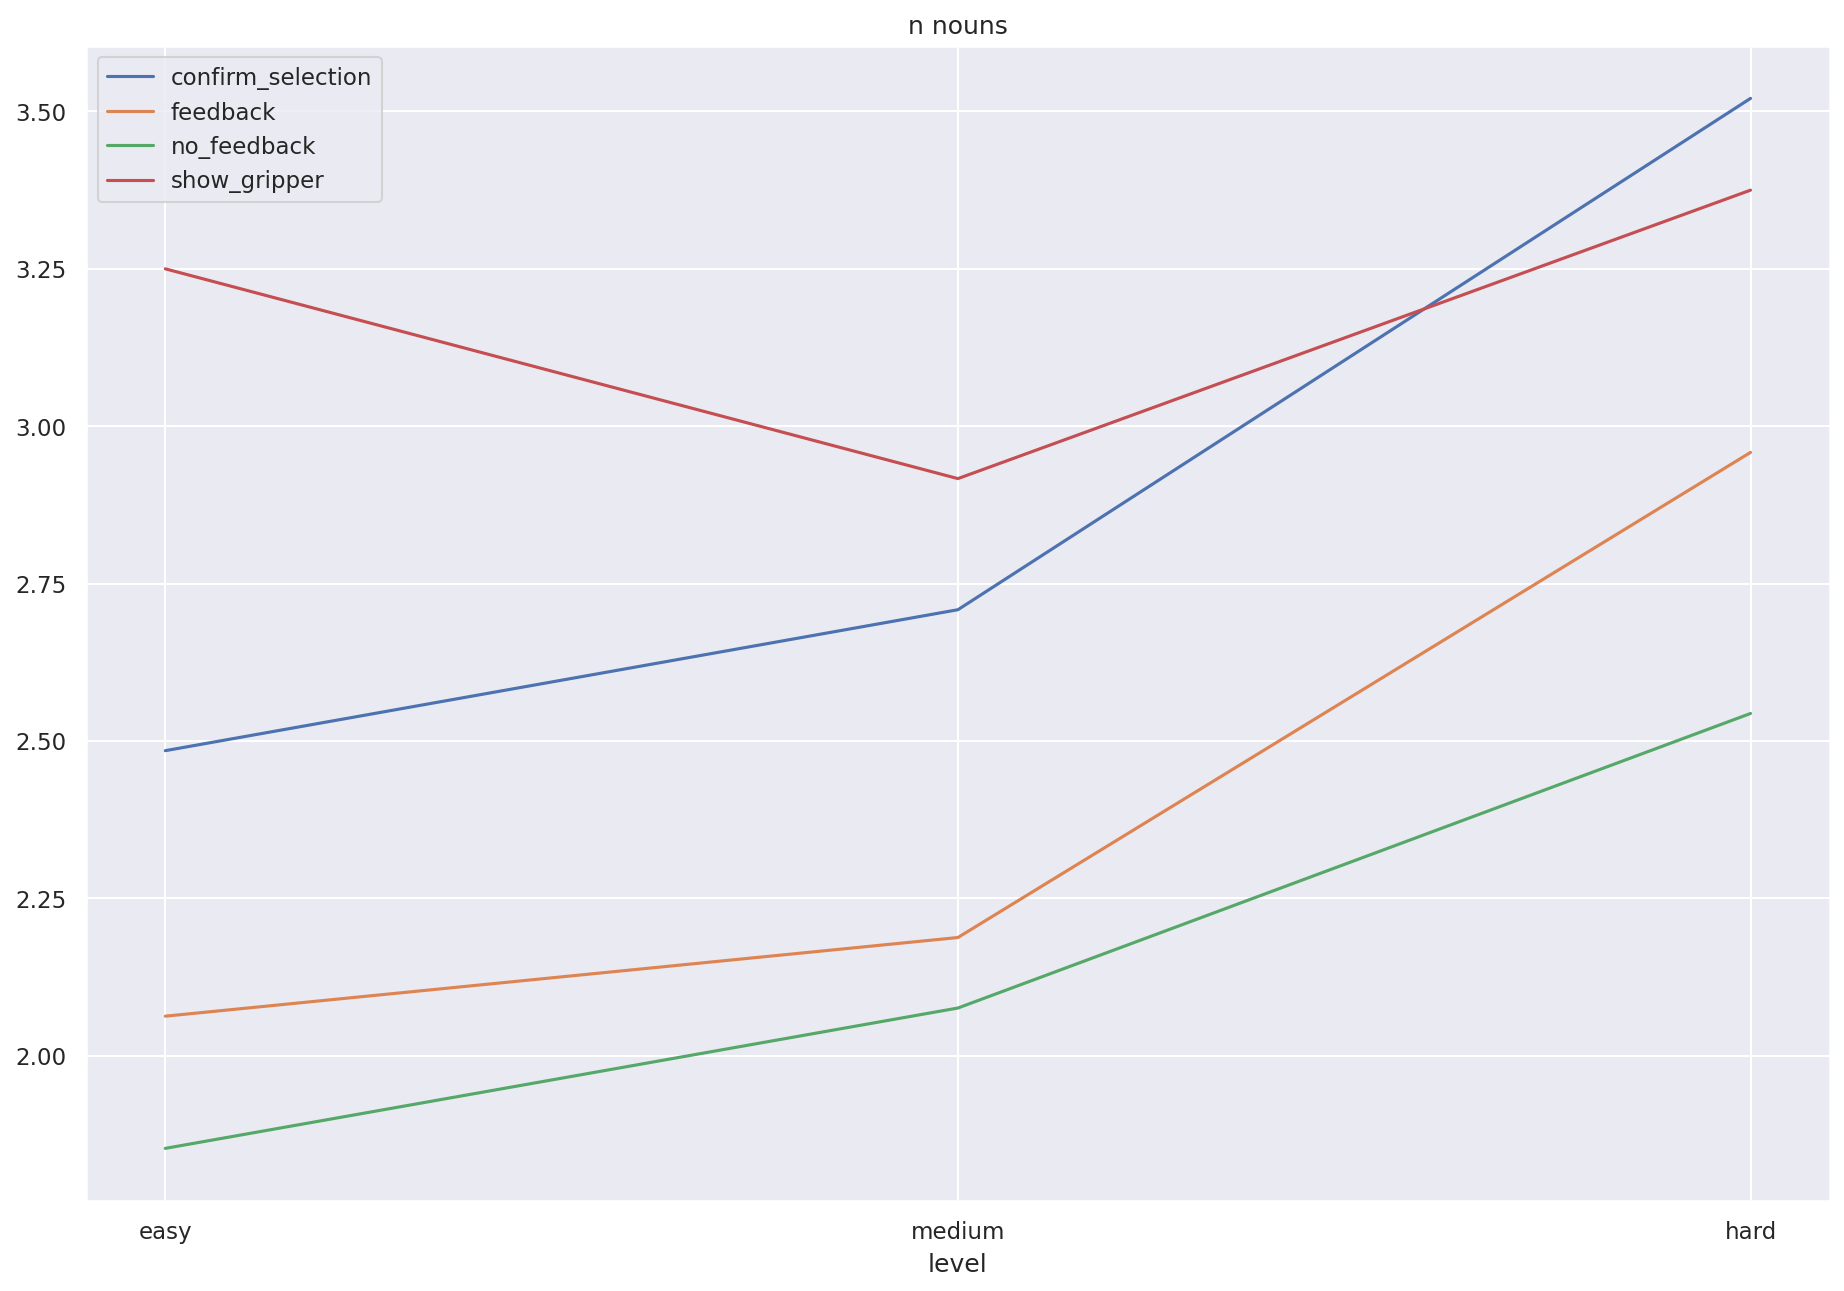

In [12]:
# get mean values across all difficoulty level based on design
to_plot = ["accuracy", "lag to typing", "lag to description", "reaction time", "n tokens", "n adjectives", "n adverbs", "n nouns"]


for item in to_plot:
    figure(figsize=(15, 10), dpi=150)
    fig = sns.lineplot((
        df[[i for i in df.columns if i not in {"board id", "batch position"}]]
        .groupby(["design", "level"])
        .mean(numeric_only=True)
    ).unstack(level=0)[item])#.plot(figsize=(10, 5), kind="line")
    
    fig.set_title(item)
    plt.xticks([1, 2, 3])
    fig.set_xticklabels(["easy", "medium", "hard"])
    
    for line in fig.lines:
        line.set_linestyle("-")
    
    leg = plt.legend()
    # get the individual lines inside legend and set line width
    for line in leg.get_lines():
        line.set_linestyle("-")
    plt.show()


## TABLE 4: mean values bydesign and batch position

In [13]:
# get mean values across all difficoulty level based on design
(
    df
    [[i for i in df.columns if i not in {"board id", "level"}]]
    [df["batch position"] < 21]
    .groupby(["design", "batch position"])
    .mean(numeric_only=True)
).round(2).unstack(level=0)[[(          'accuracy',       'no_feedback'),
            (          'accuracy',          'feedback'),
            (          'accuracy', 'confirm_selection'),
            (          'accuracy',      'show_gripper'),
            (     'lag to typing',       'no_feedback'),
            (     'lag to typing',          'feedback'),
            (     'lag to typing', 'confirm_selection'),
            (     'lag to typing',      'show_gripper'),
            ('lag to description',       'no_feedback'),
            ('lag to description',          'feedback'),
            ('lag to description', 'confirm_selection'),
            ('lag to description',      'show_gripper'),
            (     'reaction time',       'no_feedback'),
            (     'reaction time',          'feedback'),
            (     'reaction time', 'confirm_selection'),
            (     'reaction time',      'show_gripper'),
            (          'n tokens',       'no_feedback'),
            (          'n tokens',          'feedback'),
            (          'n tokens', 'confirm_selection'),
            (          'n tokens',      'show_gripper'),
            (      'n adjectives',       'no_feedback'),
            (      'n adjectives',          'feedback'),
            (      'n adjectives', 'confirm_selection'),
            (      'n adjectives',      'show_gripper'),
            (         'n adverbs',       'no_feedback'),
            (         'n adverbs',          'feedback'),
            (         'n adverbs', 'confirm_selection'),
            (         'n adverbs',      'show_gripper'),
            (           'n nouns',       'no_feedback'),
            (           'n nouns',          'feedback'),
            (           'n nouns', 'confirm_selection'),
            (           'n nouns',      'show_gripper')]].T

batch position                            1       2       3       4       5   \
                   design                                                      
accuracy           no_feedback         83.33   60.00   80.00   40.00   60.00   
                   feedback            87.50  100.00   62.50  100.00   87.50   
                   confirm_selection  100.00  100.00  100.00  100.00  100.00   
                   show_gripper        87.50   87.50   87.50   87.50  100.00   
lag to typing      no_feedback         17.20   12.00    8.75    9.50   16.25   
                   feedback            16.33    8.33    8.33    8.50   11.50   
                   confirm_selection   15.83    9.17    7.67    6.00    5.00   
                   show_gripper         9.14    4.43    8.29    7.14    4.83   
lag to description no_feedback         45.17   31.60   29.80   28.80   37.60   
                   feedback            48.00   34.38   60.38   28.38   32.12   
                   confirm_selection   45.75   37.00   23.75   37.12   27.50   
                   show_gripper        30.25   19.00   31.75   34.25   20.75   
reaction time      no_feedback          7.50    8.40    9.40   11.40   12.20   
                   feedback             9.38   10.25    9.00    6.12    7.62   
                   confirm_selection    8.50    9.25    5.62   11.50    9.62   
                   show_gripper        17.25   15.88   15.00   15.50   12.75   
n tokens           no_feedback          7.17    7.80    7.80    9.20    9.20   
                   feedback            11.00    8.50   13.12    8.75    9.88   
                   confirm_selection   13.00   12.75    9.12   12.62   10.88   
                   show_gripper        14.38   11.38   20.12   15.25   11.62   
n adjectives       no_feedback          0.83    1.20    2.00    0.80    1.40   
                   feedback             1.50    2.00    2.12    2.00    1.50   
                   confirm_selection    2.00    2.00    1.75    1.62    2.25   
                   show_gripper         2.00    1.38    2.38    2.00    1.12   
n adverbs          no_feedback          0.50    0.20    0.00    0.60    0.00   
                   feedback             0.38    0.12    0.25    0.12    0.62   
                   confirm_selection    0.38    0.38    0.12    0.75    0.50   
                   show_gripper         0.25    0.25    1.12    0.00    0.38   
n nouns            no_feedback          1.50    2.00    1.80    2.20    2.60   
                   feedback             2.50    2.50    2.50    2.00    2.00   
                   confirm_selection    2.75    2.38    1.75    2.38    2.38   
                   show_gripper         3.12    2.88    4.25    2.75    3.00   

batch position                            6       7       8       9       10  \
                   design                                                      
accuracy           no_feedback         80.00   80.00   80.00   80.00   80.00   
                   feedback           100.00  100.00   75.00   75.00  100.00   
                   confirm_selection  100.00  100.00  100.00  100.00  100.00   
                   show_gripper       100.00  100.00   75.00  100.00  100.00   
lag to typing      no_feedback          6.50    5.00    4.75    4.00    6.00   
                   feedback             9.17    7.17    7.83   10.17    5.00   
                   confirm_selection    5.17    6.33    5.83    6.83    6.17   
                   show_gripper         4.57    5.29    7.14    5.57    5.29   
lag to description no_feedback         22.40   13.20   16.00   13.20   14.20   
                   feedback            31.25   34.38   28.00   41.12   23.38   
                   confirm_selection   26.62   25.25   42.12   25.75   39.88   
                   show_gripper        25.00   20.50   22.38   29.12   25.00   
reaction time      no_feedback          8.60    7.60    8.40    6.00    4.60   
                   feedback             7.00   12.75   11.12   10.38   10.00   

### latex

In [14]:
# get mean values across all difficoulty level based on design

print((
    df
    [[i for i in df.columns if i not in {"board id", "level"}]]
    [df["batch position"] < 21]
    .groupby(["design", "batch position"])
    .mean(numeric_only=True)
).round(2).unstack(level=0)[[(          'accuracy',       'no_feedback'),
            (          'accuracy',          'feedback'),
            (          'accuracy', 'confirm_selection'),
            (          'accuracy',      'show_gripper'),
            (     'lag to typing',       'no_feedback'),
            (     'lag to typing',          'feedback'),
            (     'lag to typing', 'confirm_selection'),
            (     'lag to typing',      'show_gripper'),
            ('lag to description',       'no_feedback'),
            ('lag to description',          'feedback'),
            ('lag to description', 'confirm_selection'),
            ('lag to description',      'show_gripper'),
            (     'reaction time',       'no_feedback'),
            (     'reaction time',          'feedback'),
            (     'reaction time', 'confirm_selection'),
            (     'reaction time',      'show_gripper'),
            (          'n tokens',       'no_feedback'),
            (          'n tokens',          'feedback'),
            (          'n tokens', 'confirm_selection'),
            (          'n tokens',      'show_gripper'),
            (      'n adjectives',       'no_feedback'),
            (      'n adjectives',          'feedback'),
            (      'n adjectives', 'confirm_selection'),
            (      'n adjectives',      'show_gripper'),
            (         'n adverbs',       'no_feedback'),
            (         'n adverbs',          'feedback'),
            (         'n adverbs', 'confirm_selection'),
            (         'n adverbs',      'show_gripper'),
            (           'n nouns',       'no_feedback'),
            (           'n nouns',          'feedback'),
            (           'n nouns', 'confirm_selection'),
            (           'n nouns',      'show_gripper')]].T.to_latex())

\begin{tabular}{llrrrrrrrrrrrrrrrrrrrr}
\toprule
        & batch position &      1  &      2  &      3  &      4  &      5  &      6  &      7  &      8  &      9  &      10 &      11 &      12 &      13 &      14 &      15 &      16 &      17 &      18 &      19 &      20 \\
{} & design &         &         &         &         &         &         &         &         &         &         &         &         &         &         &         &         &         &         &         &         \\
\midrule
accuracy & no\_feedback &   83.33 &   60.00 &   80.00 &   40.00 &   60.00 &   80.00 &   80.00 &   80.00 &   80.00 &   80.00 &   60.00 &   80.00 &  100.00 &   80.00 &   80.00 &  100.00 &   80.00 &  100.00 &   80.00 &  100.00 \\
        & feedback &   87.50 &  100.00 &   62.50 &  100.00 &   87.50 &  100.00 &  100.00 &   75.00 &   75.00 &  100.00 &   87.50 &   87.50 &  100.00 &  100.00 &   75.00 &  100.00 &  100.00 &  100.00 &  100.00 &  100.00 \\
        & confirm\_selection &  100.00 &  100.00 &

/tmp/ipykernel_2062781/2641122499.py:40: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  (           'n nouns',      'show_gripper')]].T.to_latex())


## plot table 4 of all variables by batch position

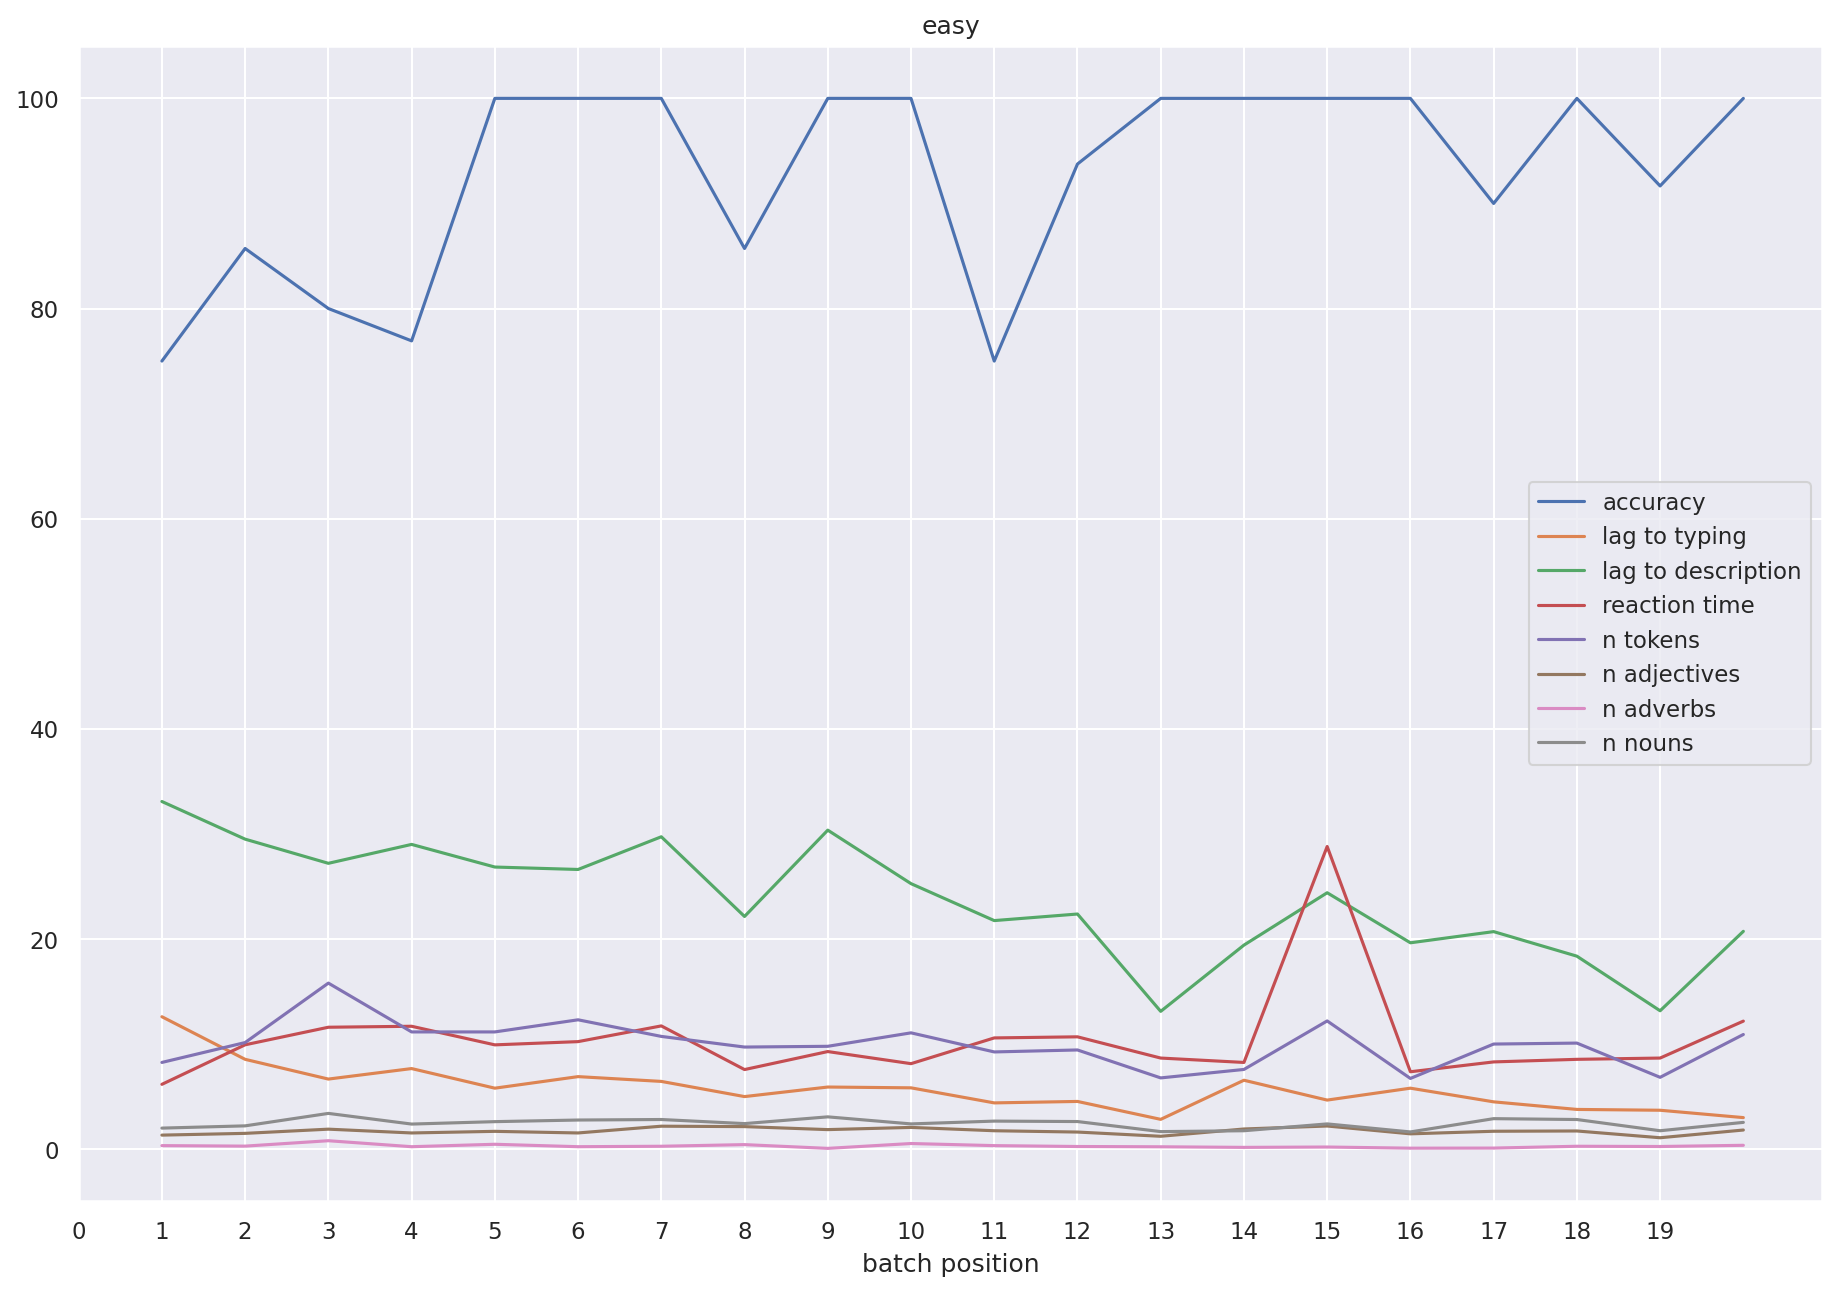

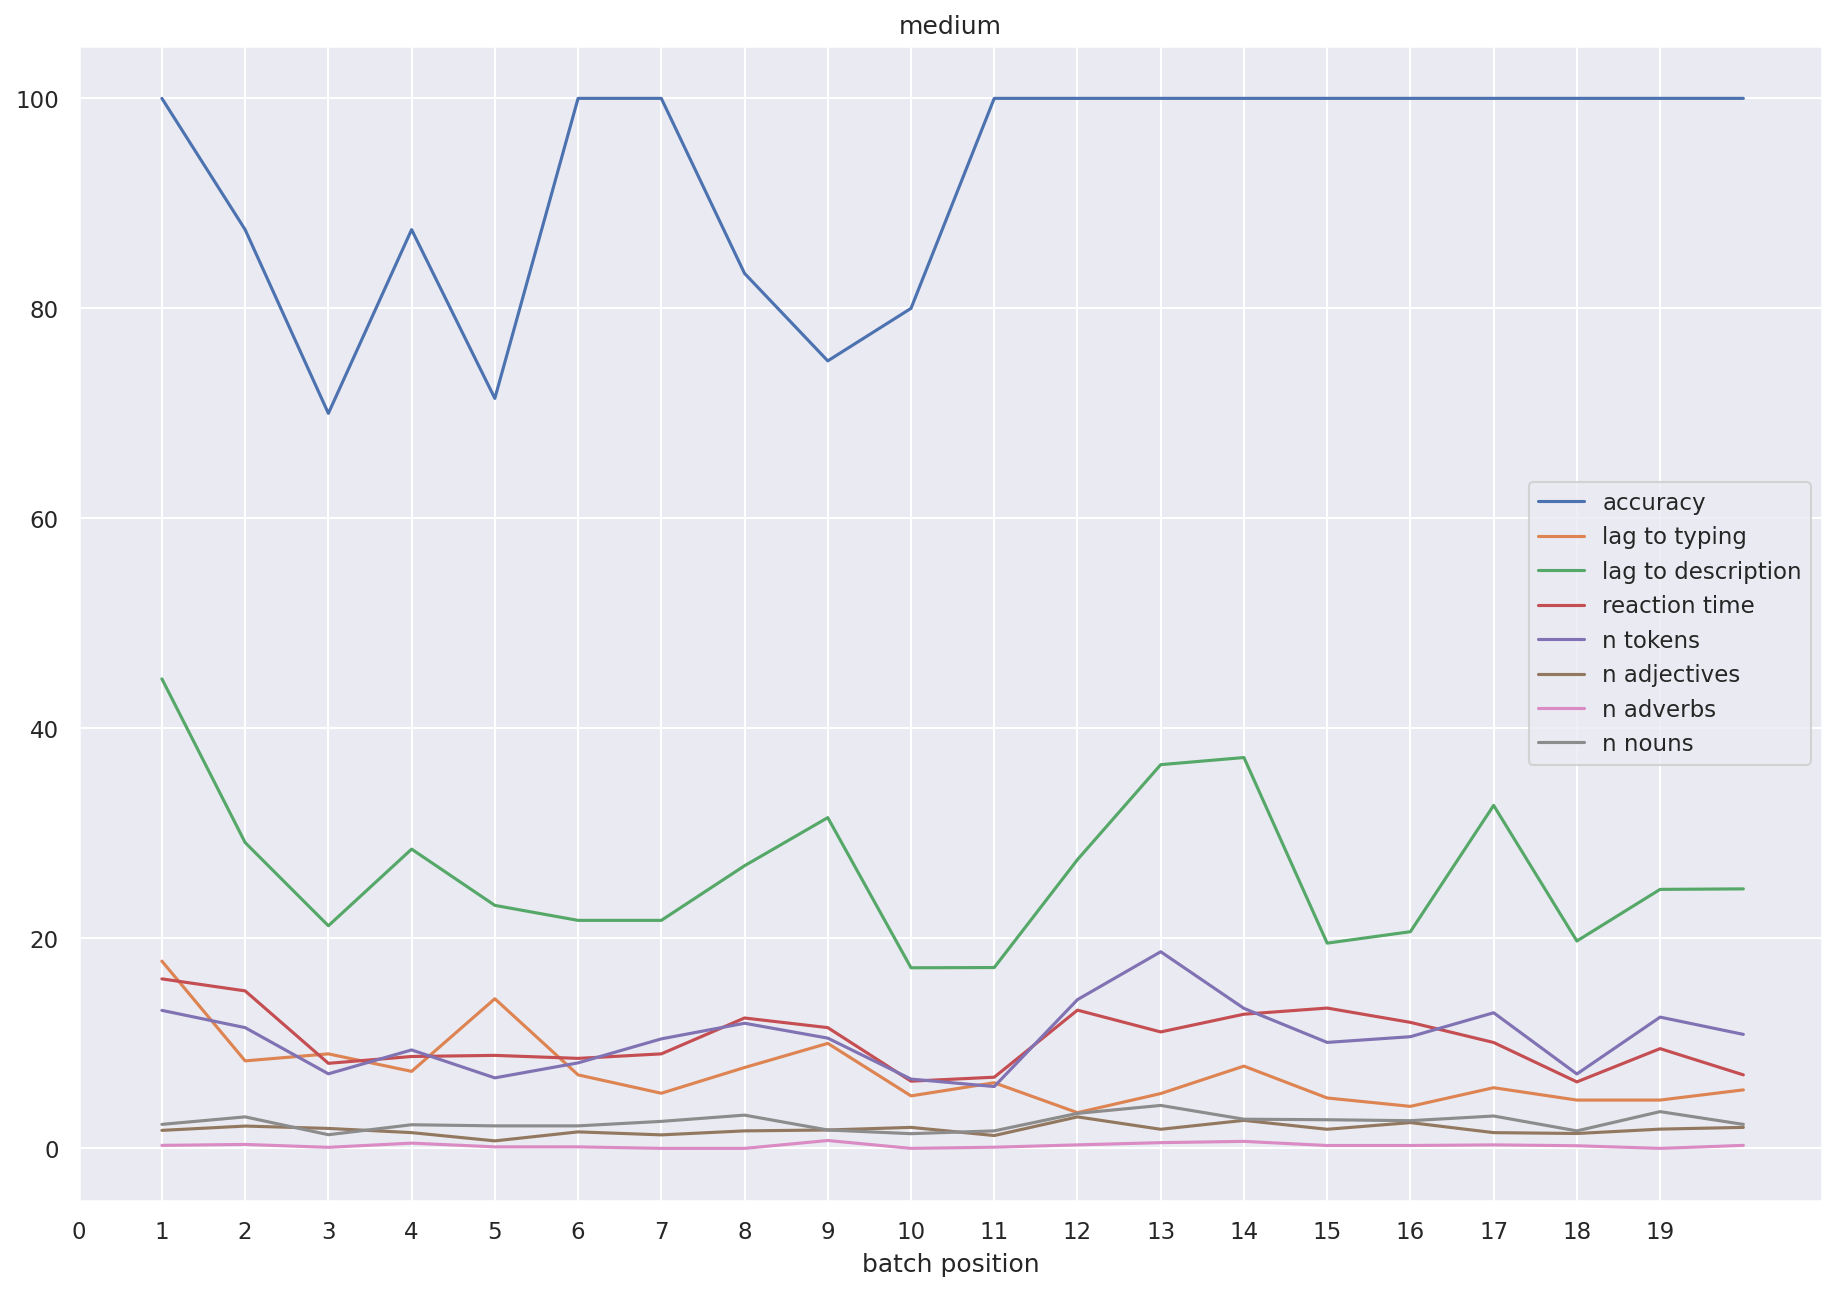

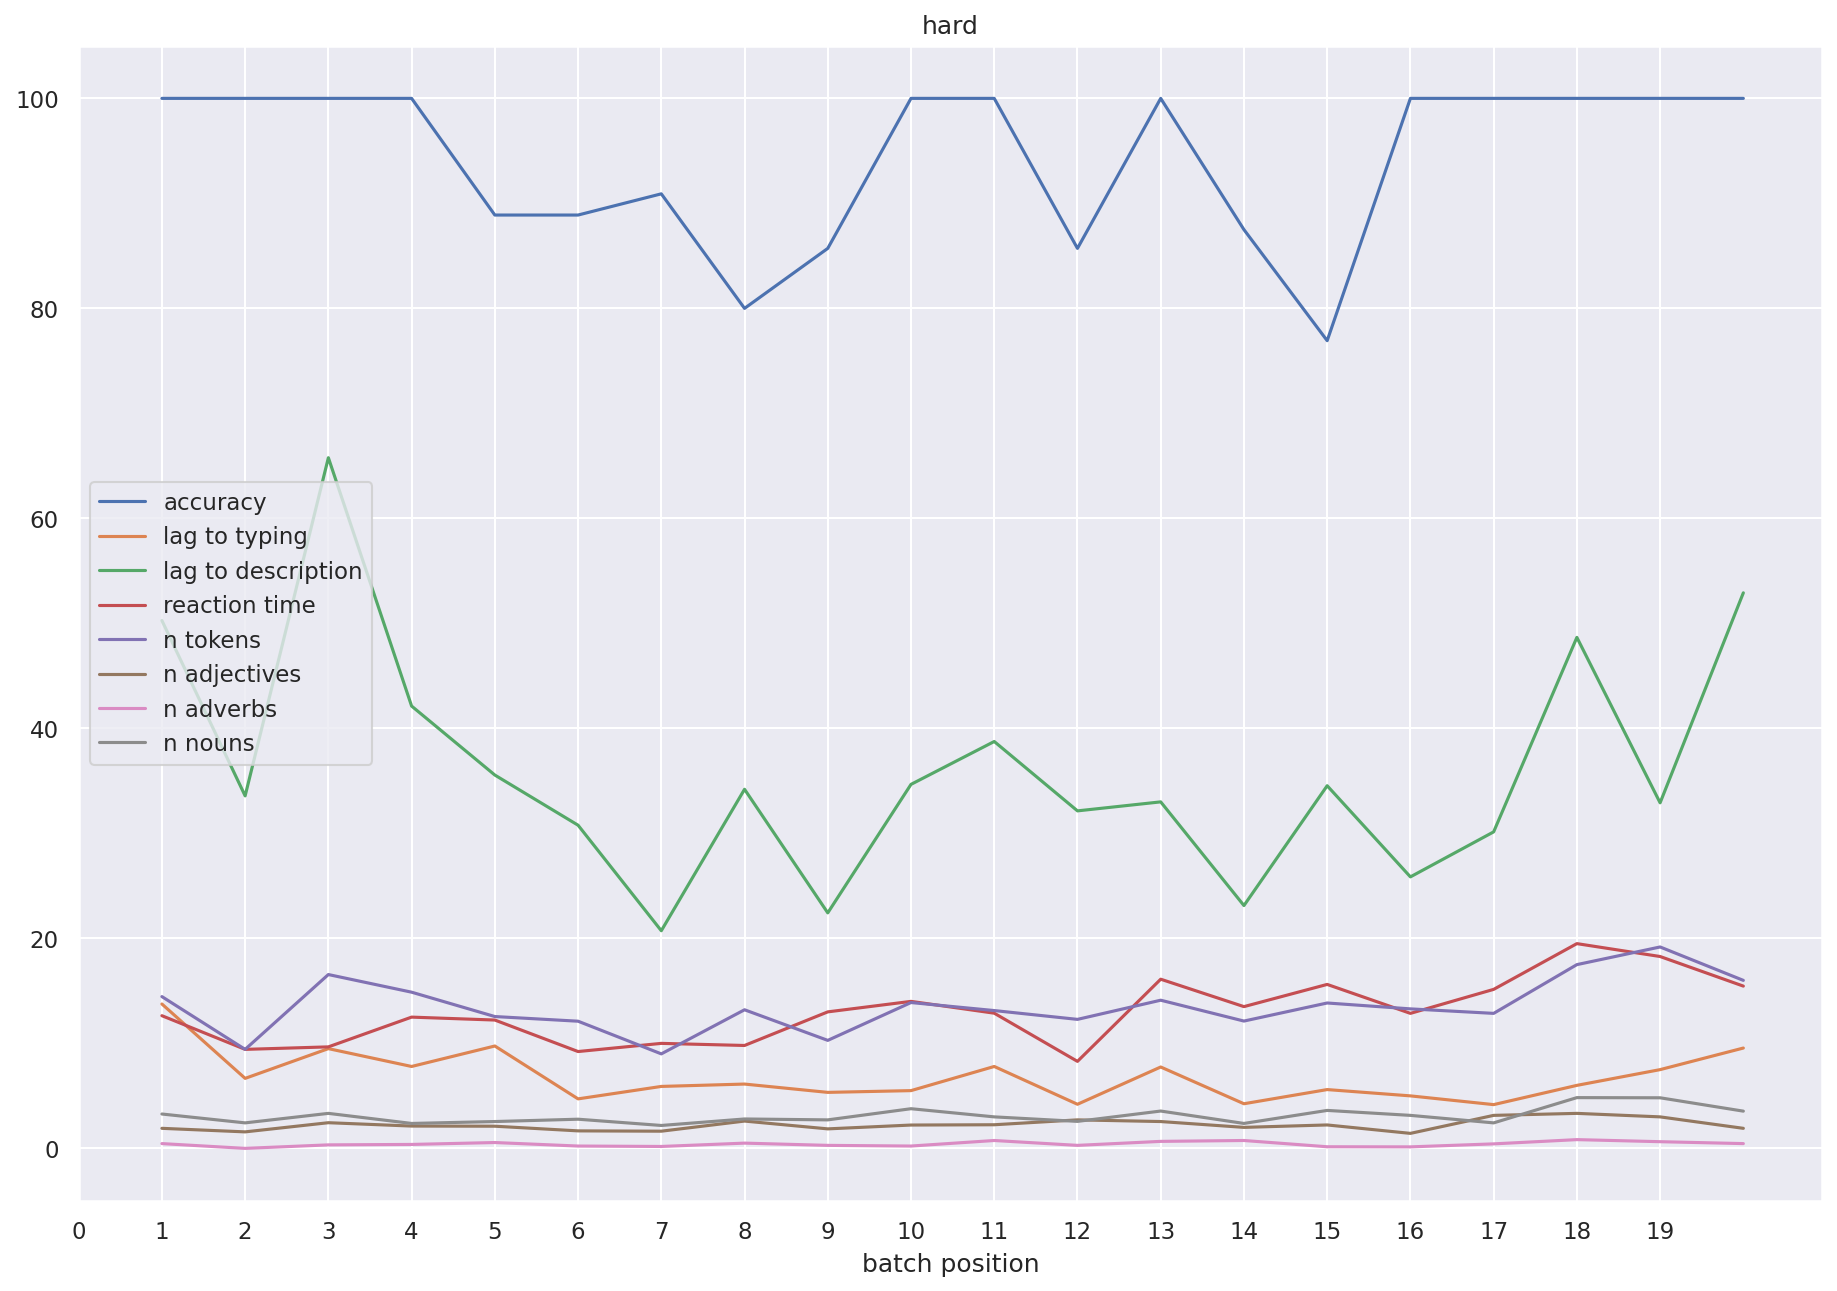

In [15]:
titles = {
    1: "easy",
    2: "medium",
    3: "hard"
}

for level in range(1, 4):
    columns = [i for i in df.columns if i not in {"board id"}]
    figure(figsize=(15, 10), dpi=150)
    image = sns.lineplot(
        df
        [(df["level"] == level) & (df["batch position"] < 21)]
        [columns]
        .drop(columns=["level"])
        .groupby("batch position")
        .mean(numeric_only=True)
    )
    
    image.set_title(titles[level])

    for line in image.lines:
        line.set_linestyle("-")

    leg = plt.legend()
    # get the individual lines inside legend and set line width
    for line in leg.get_lines():
        line.set_linestyle("-")

    new_list = range(0, 20)
    plt.xticks(new_list)

## TABLE 5: containing mean values by batch position across all designs

In [16]:
columns = [i for i in df.columns if i not in {"board id"}]
(
    df
    [(df["batch position"] < 21)]
    [columns]
    .drop(columns=["level"])
    .groupby("batch position")
    .mean(numeric_only=True)
)

accuracy  lag to typing  lag to description  reaction time  \
batch position                                                                 
1                90.000000      14.291667           42.100000      10.866667   
2                89.655172       8.000000           30.379310      11.206897   
3                82.758621       8.217391           37.103448       9.793103   
4                86.206897       7.608696           32.482759      11.103448   
5                89.655172       8.772727           28.655172      10.379310   
6                96.551724       6.260870           26.724138       9.517241   
7                96.551724       6.000000           24.379310      10.413793   
8                82.758621       6.565217           28.275862      10.344828   
9                89.655172       6.826087           28.758621      10.793103   
10               96.551724       5.565217           26.793103       9.655172   
11               89.655172       5.782609           25.034483      10.034483   
12               93.103448       4.217391           25.793103      10.620690   
13              100.000000       5.478261           28.172414      11.896552   
14               96.551724       6.086957           25.965517      11.103448   
15               89.655172       5.130435           27.103448      17.034483   
16              100.000000       5.043478           21.517241      10.448276   
17               96.551724       4.913043           27.931034      10.689655   
18              100.000000       4.521739           25.206897       9.896552   
19               96.551724       5.217391           23.034483      12.482759   
20              100.000000       6.347826           33.896552      12.172414   

                 n tokens  n adjectives  n adverbs   n nouns  
batch position                                                
1               11.666667      1.633333   0.366667  2.533333  
2               10.344828      1.689655   0.241379  2.482759  
3               13.034483      2.068966   0.413793  2.655172  
4               11.689655      1.689655   0.344828  2.344828  
5               10.517241      1.586207   0.413793  2.482759  
6               11.241379      1.586207   0.206897  2.620690  
7               10.000000      1.758621   0.172414  2.517241  
8               11.827586      2.103448   0.275862  2.862069  
9               10.103448      1.827586   0.310345  2.620690  
10              11.172414      2.103448   0.344828  2.655172  
11               9.275862      1.724138   0.379310  2.448276  
12              11.103448      2.172414   0.275862  2.758621  
13              13.586207      1.862069   0.482759  3.172414  
14              10.620690      2.172414   0.482759  2.241379  
15              12.137931      2.068966   0.206897  3.068966  
16               9.793103      1.827586   0.172414  2.379310  
17              11.896552      1.965517   0.275862  2.862069  
18              10.379310      1.931034   0.379310  2.758621  
19              12.689655      1.965517   0.344828  3.275862  
20              12.827586      1.896552   0.379310  2.862069

In [21]:
columns = [i for i in df.columns if i not in {"board id"}]
print((
    df
    [(df["batch position"] < 21)]
    [columns]
    .drop(columns=["level"])
    .groupby("batch position")
    .mean(numeric_only=True)
).round(2).to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  accuracy &  lag to typing &  lag to description &  reaction time &  n tokens &  n adjectives &  n adverbs &  n nouns \\
batch position &           &                &                     &                &           &               &            &          \\
\midrule
1              &     90.00 &          14.29 &               42.10 &          10.87 &     11.67 &          1.63 &       0.37 &     2.53 \\
2              &     89.66 &           8.00 &               30.38 &          11.21 &     10.34 &          1.69 &       0.24 &     2.48 \\
3              &     82.76 &           8.22 &               37.10 &           9.79 &     13.03 &          2.07 &       0.41 &     2.66 \\
4              &     86.21 &           7.61 &               32.48 &          11.10 &     11.69 &          1.69 &       0.34 &     2.34 \\
5              &     89.66 &           8.77 &               28.66 &          10.38 &     10.52 &          1.59 &       0.41 &     2.48 \\
6

/tmp/ipykernel_2062781/3863286577.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  ).round(2).to_latex())


## plot table 5

([<matplotlib.axis.XTick at 0x7ff0fee28250>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19')])

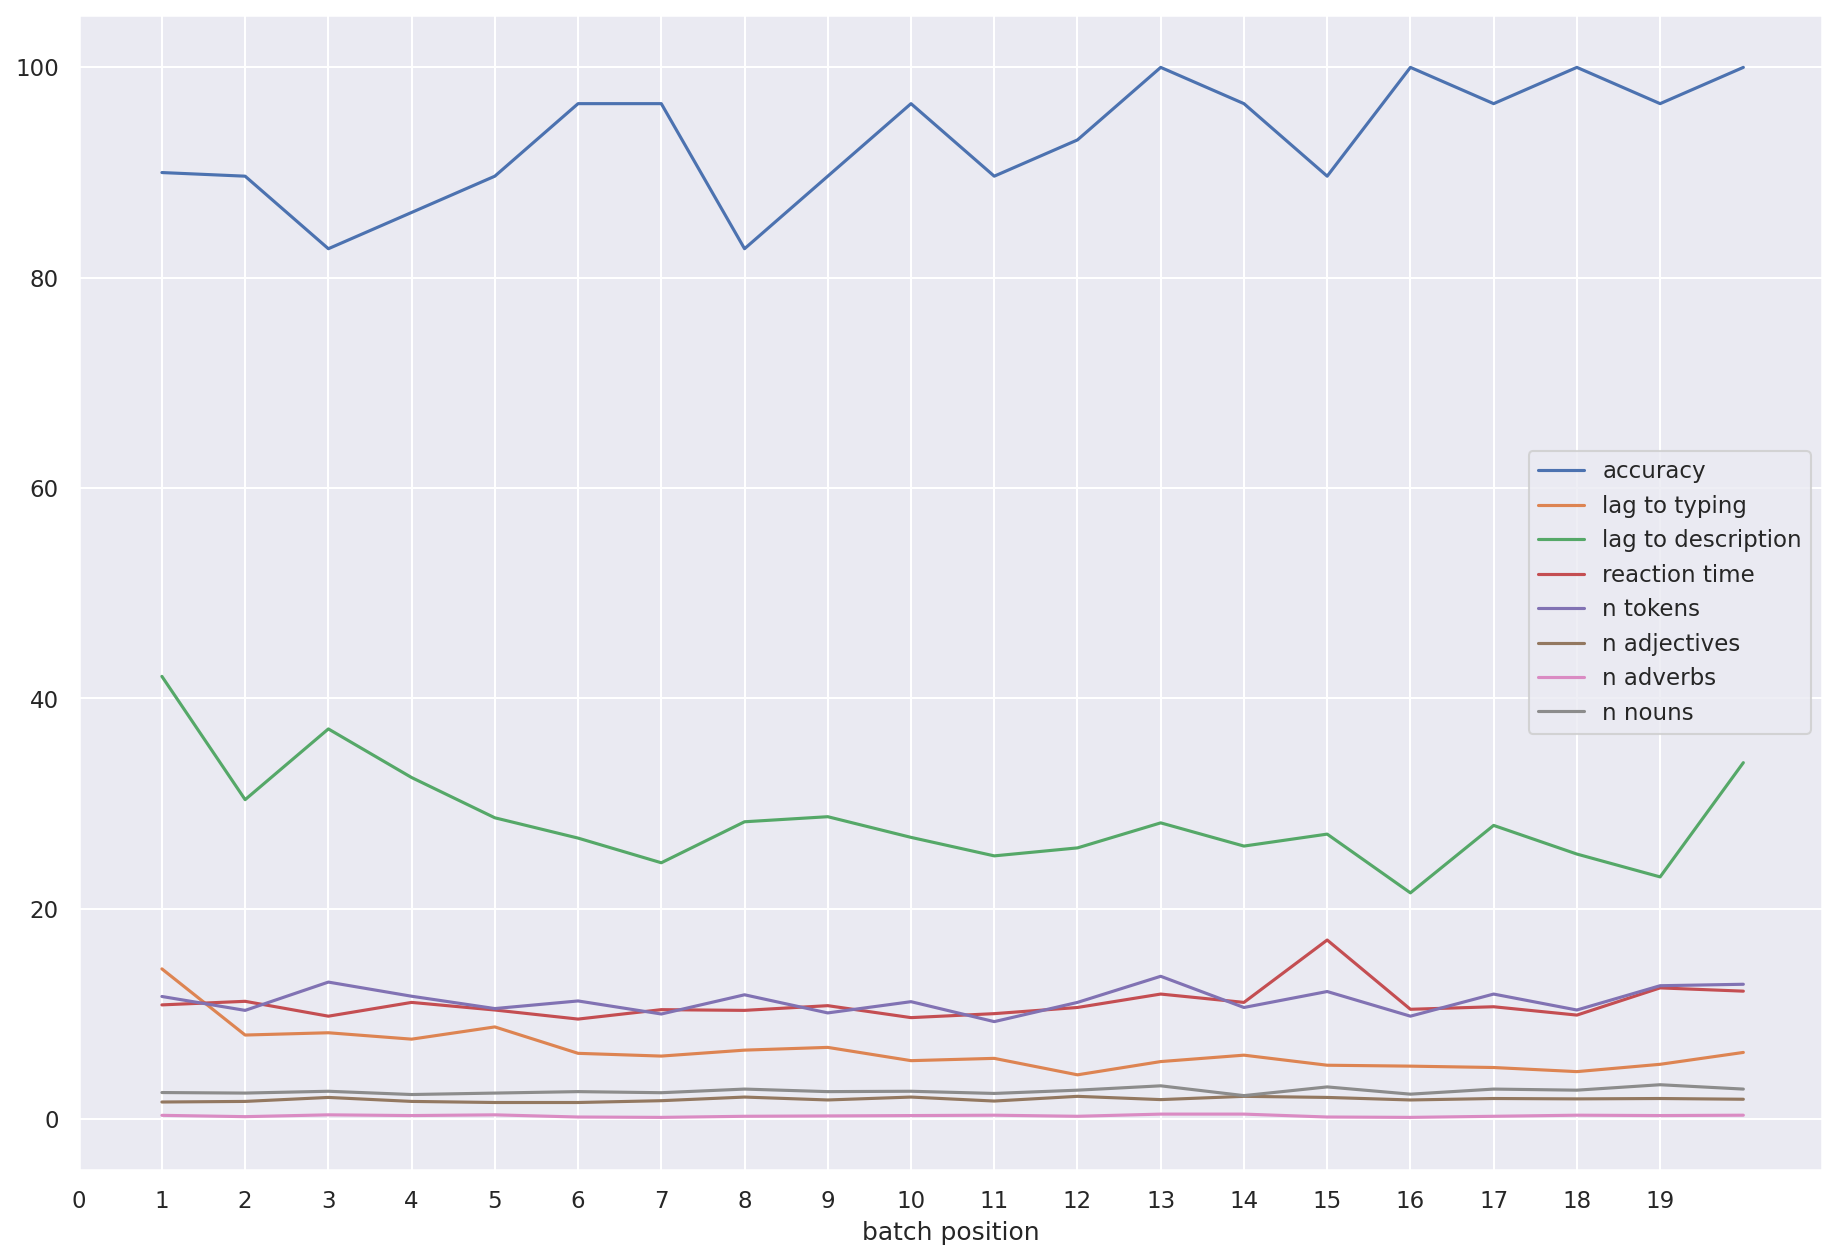

In [18]:
columns = [i for i in df.columns if i not in {"board id"}]
figure(figsize=(15, 10), dpi=150)
image = sns.lineplot(
    df
    [(df["batch position"] < 21)]
    [columns]
    .drop(columns=["level"])
    .groupby("batch position")
    .mean(numeric_only=True)
)


for line in image.lines:
    line.set_linestyle("-")

leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linestyle("-")

new_list = range(0, 20)
plt.xticks(new_list)

## plot across difficoulty level per design

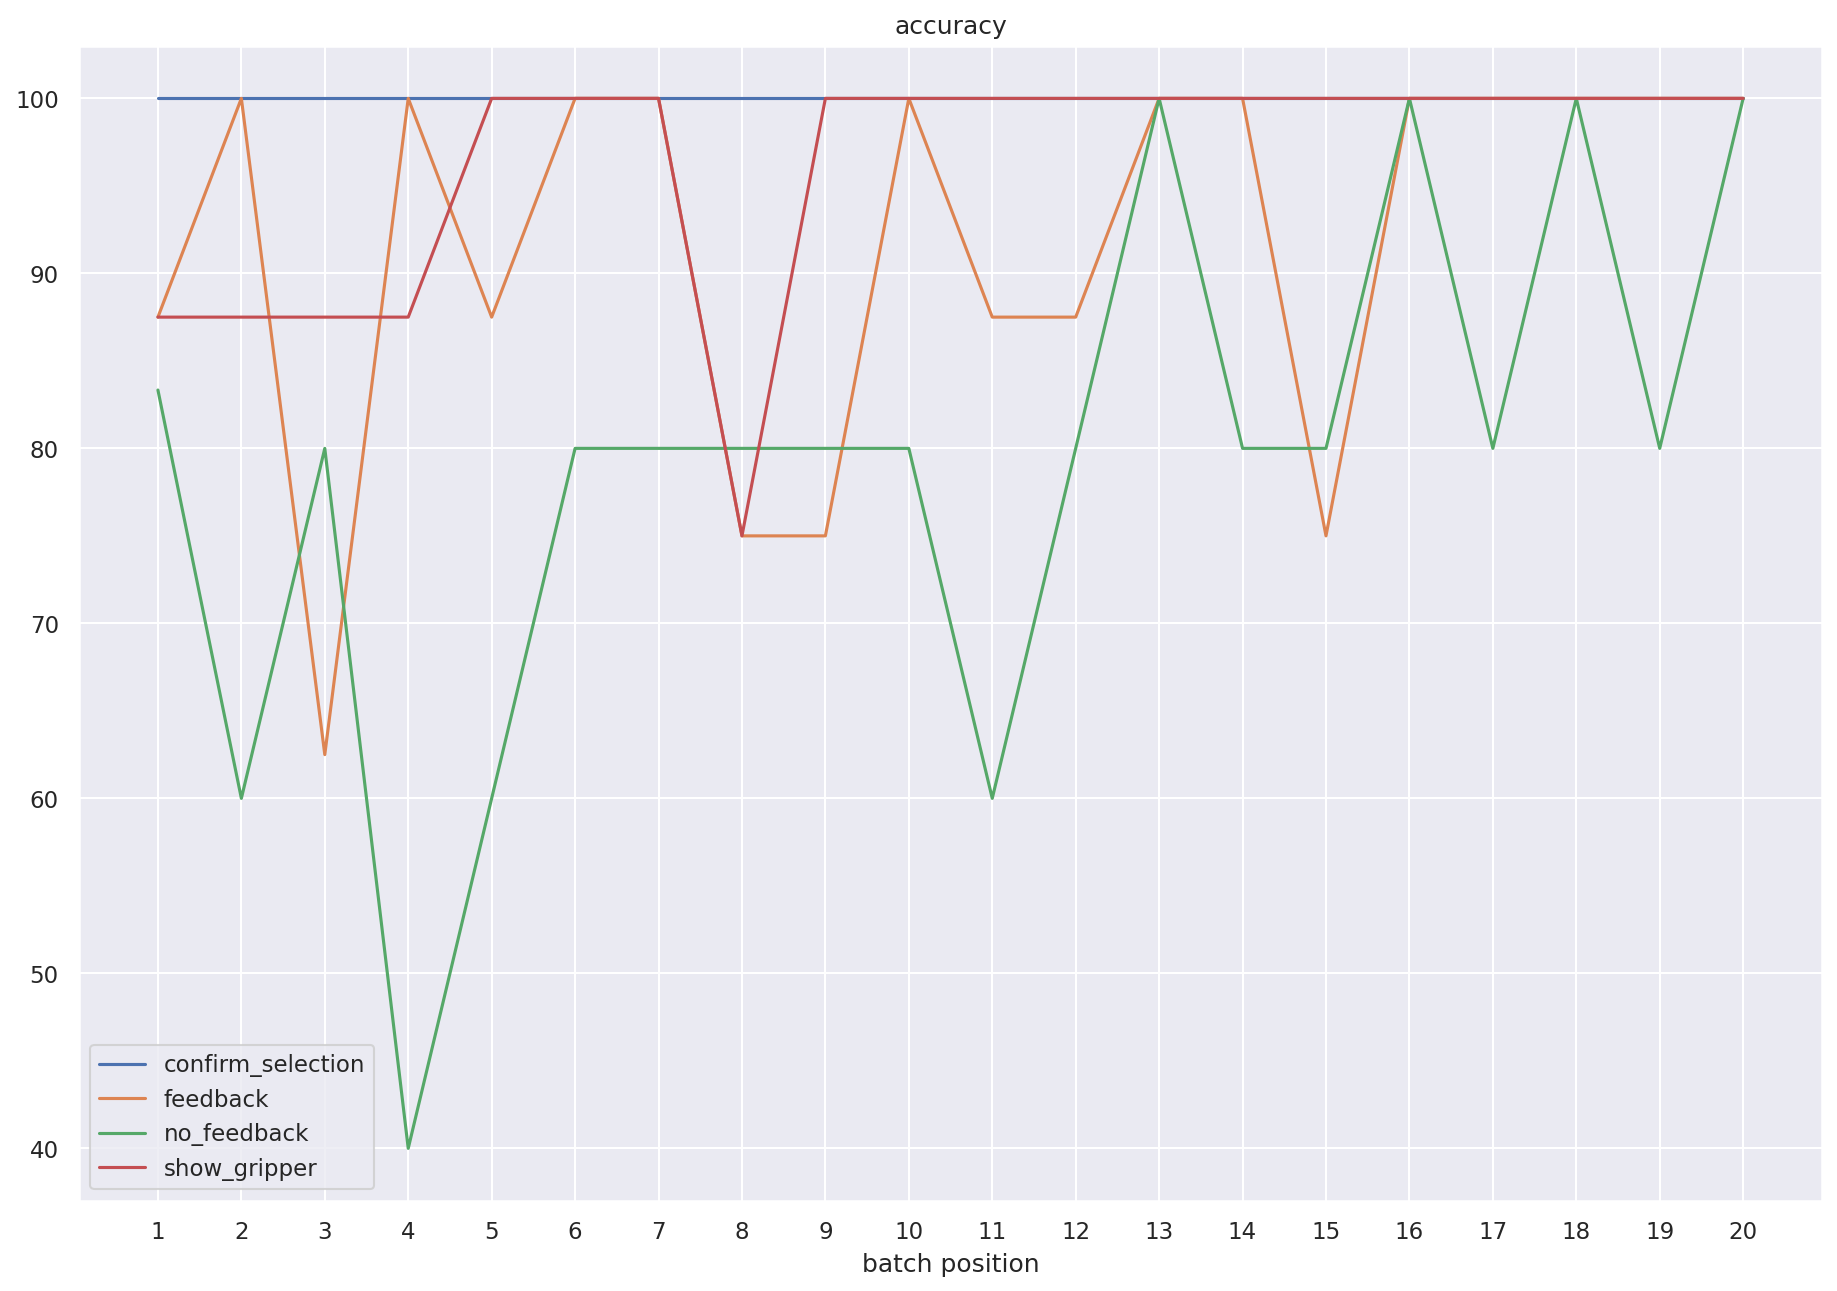

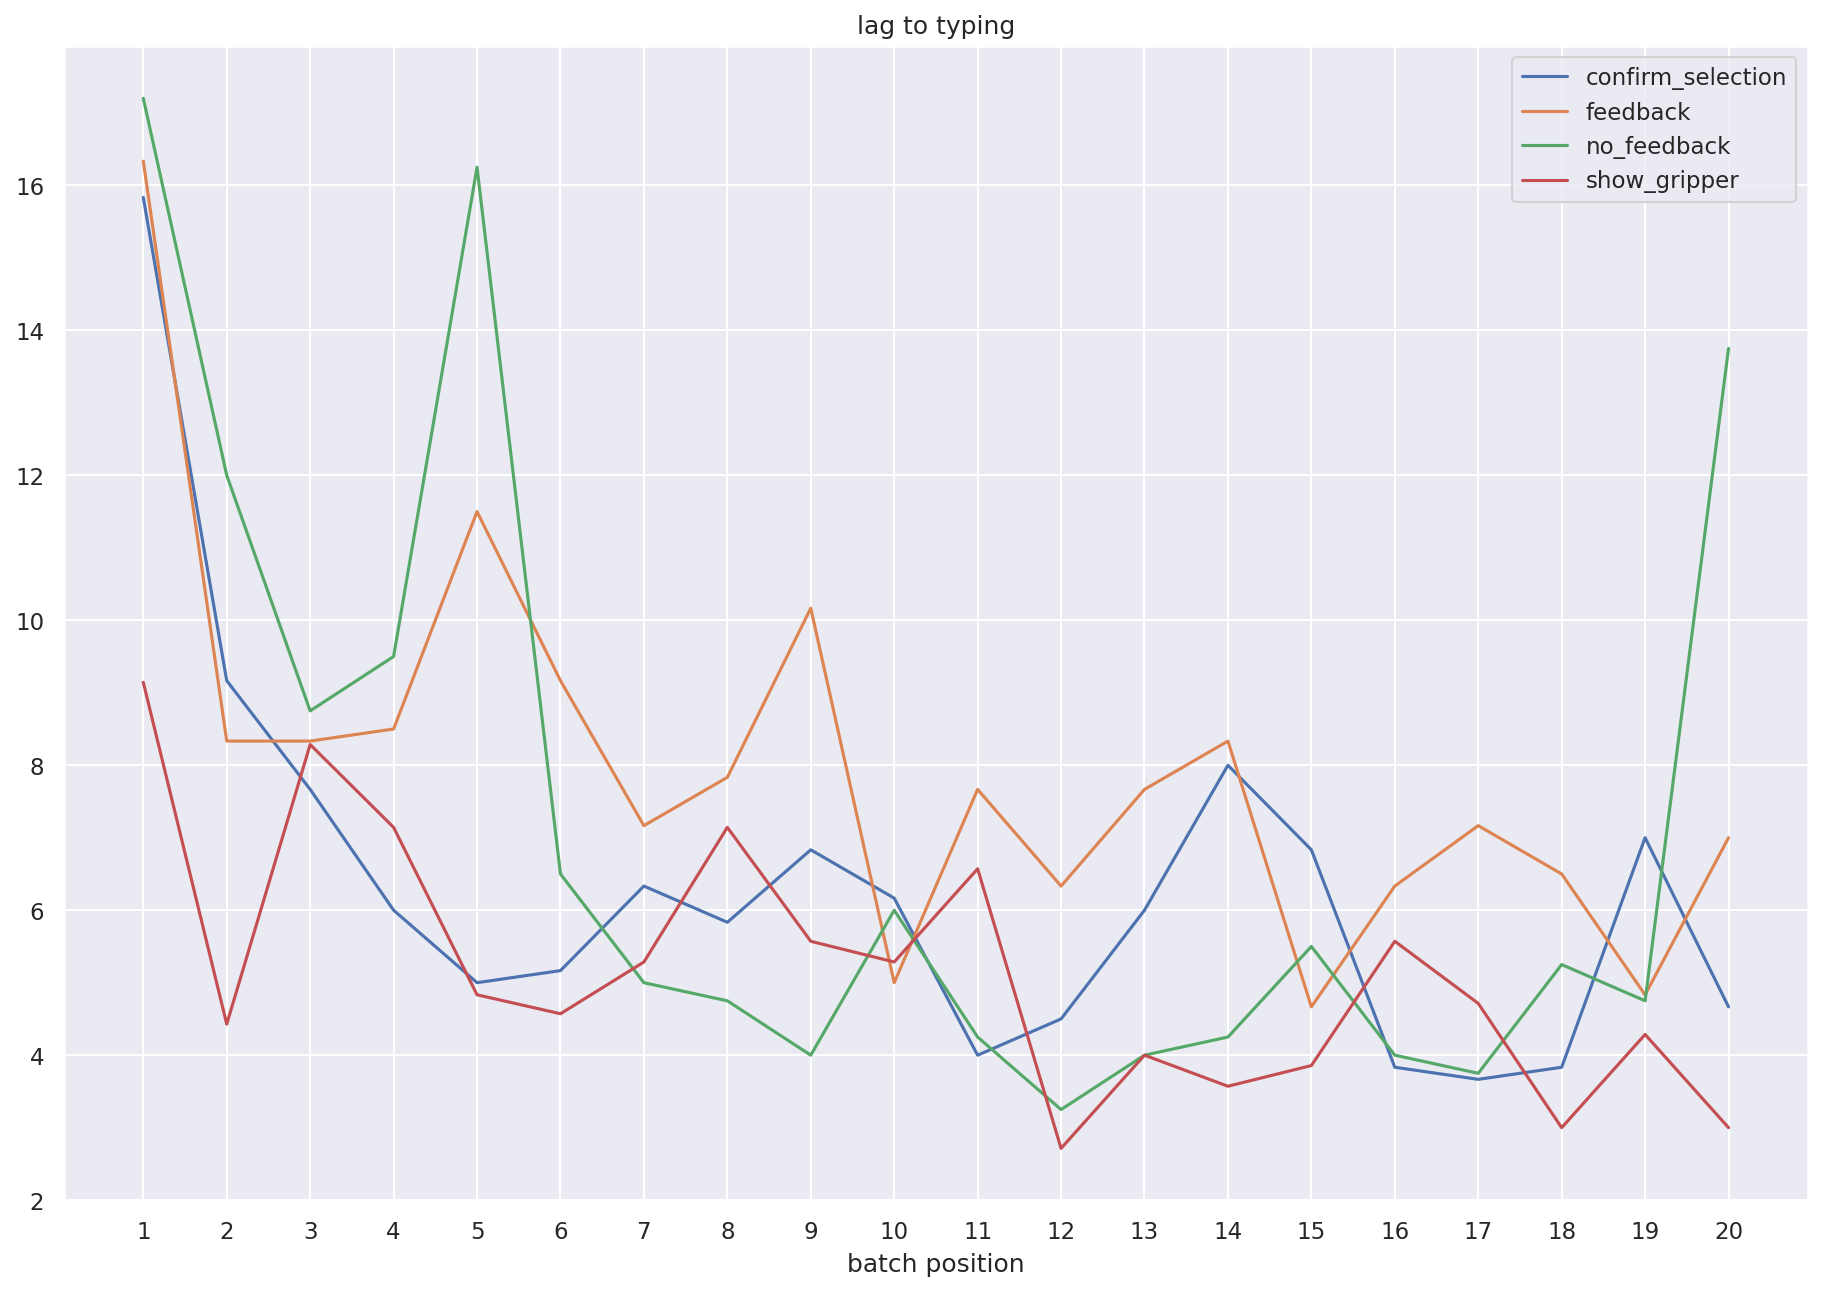

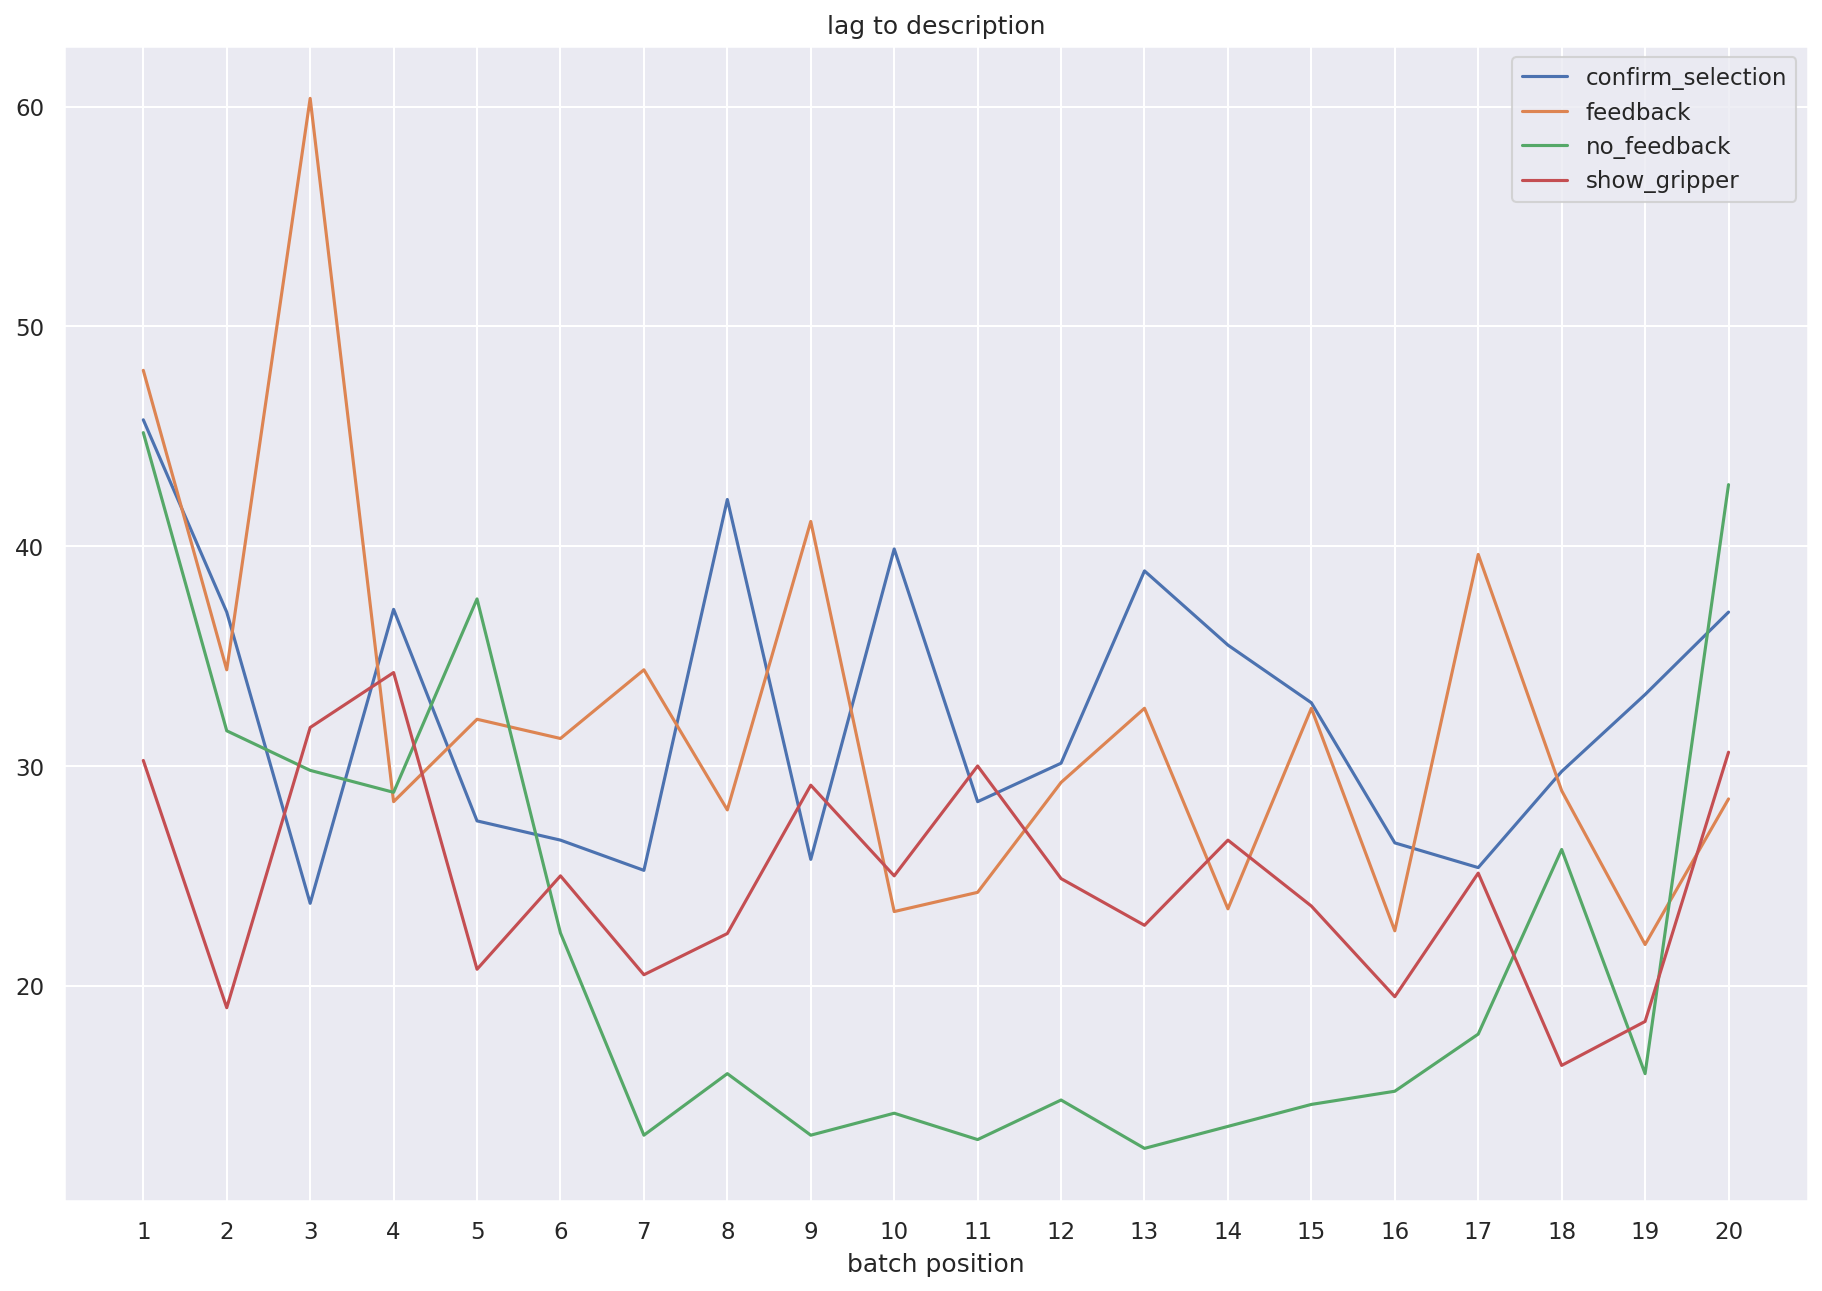

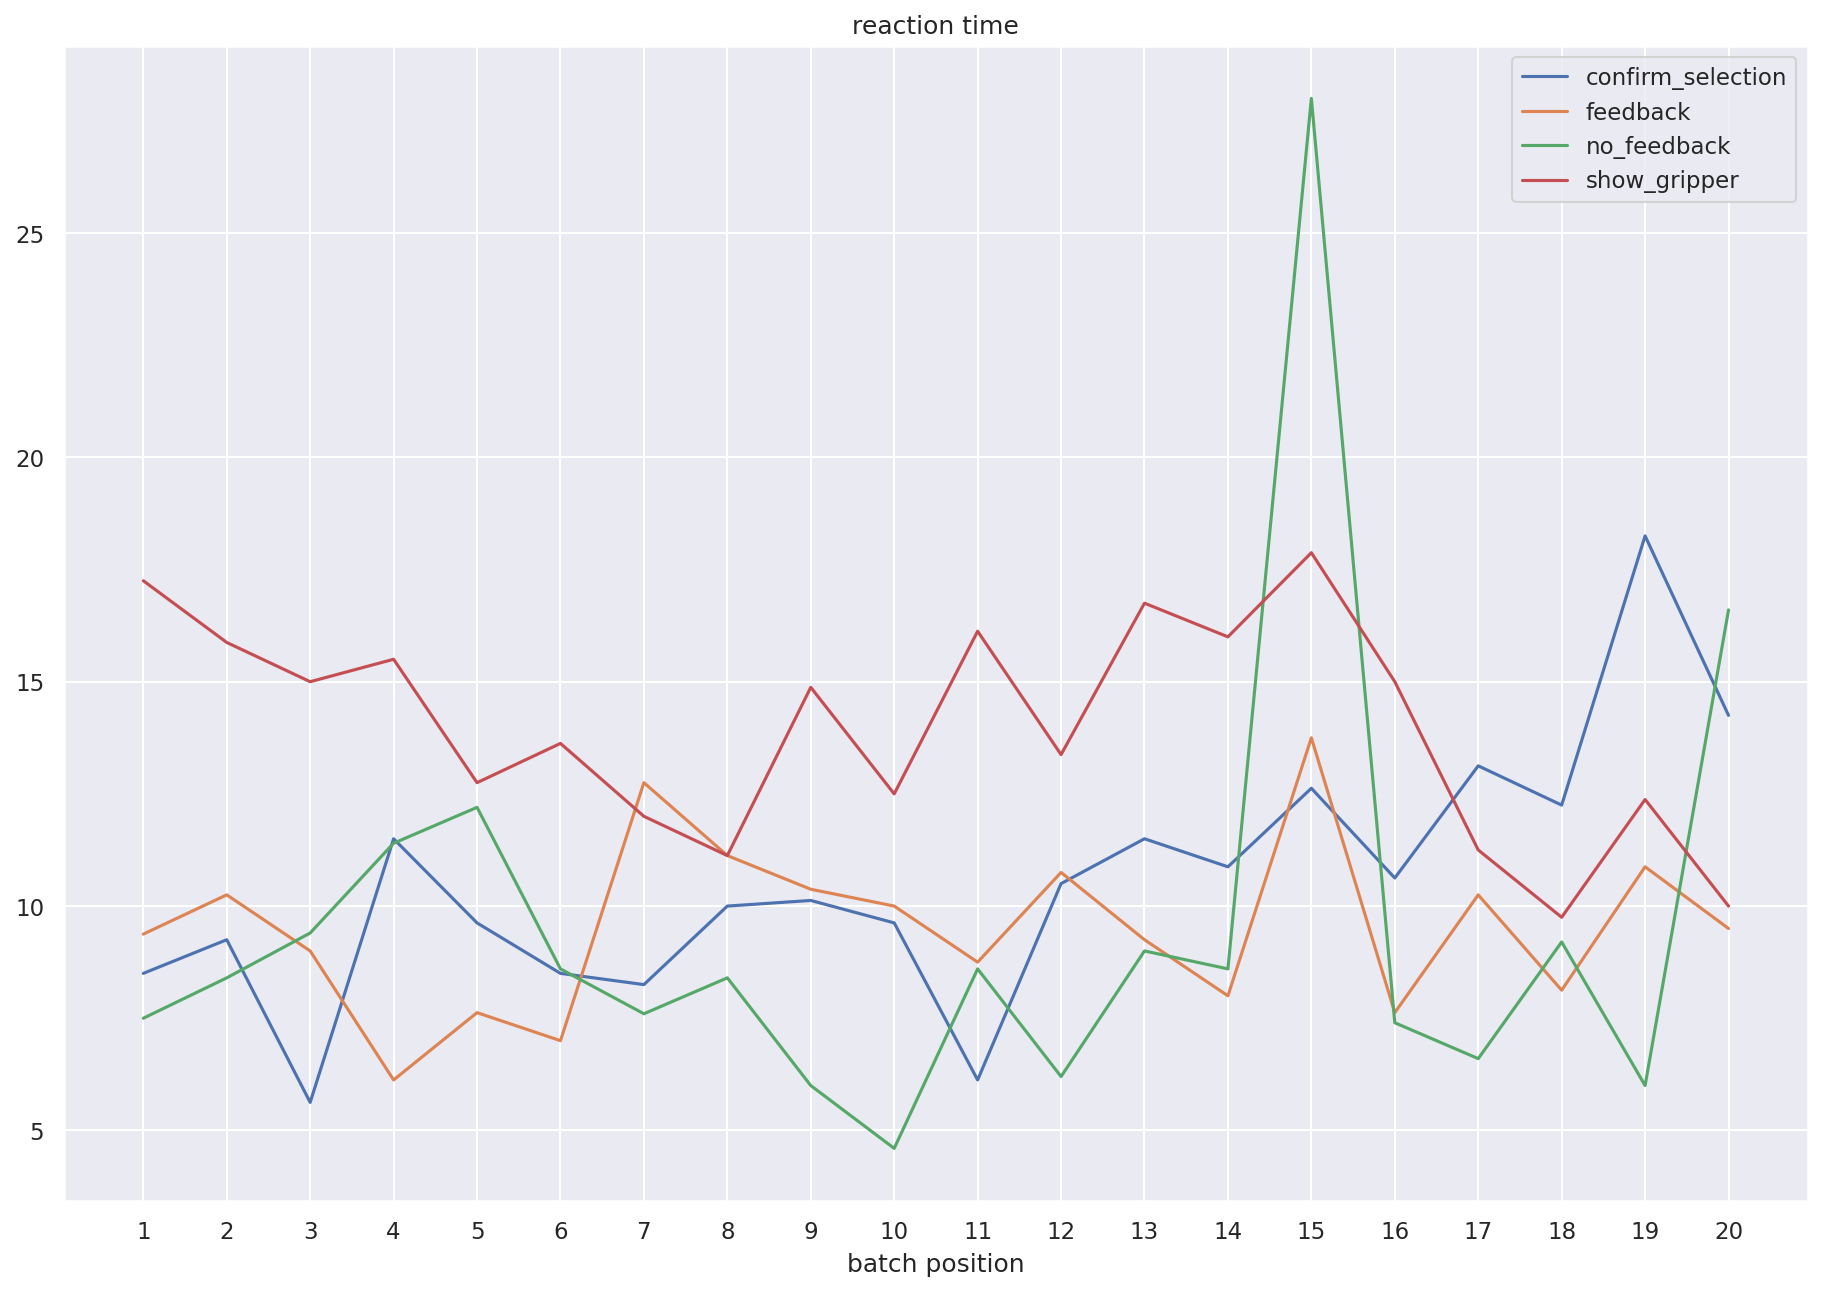

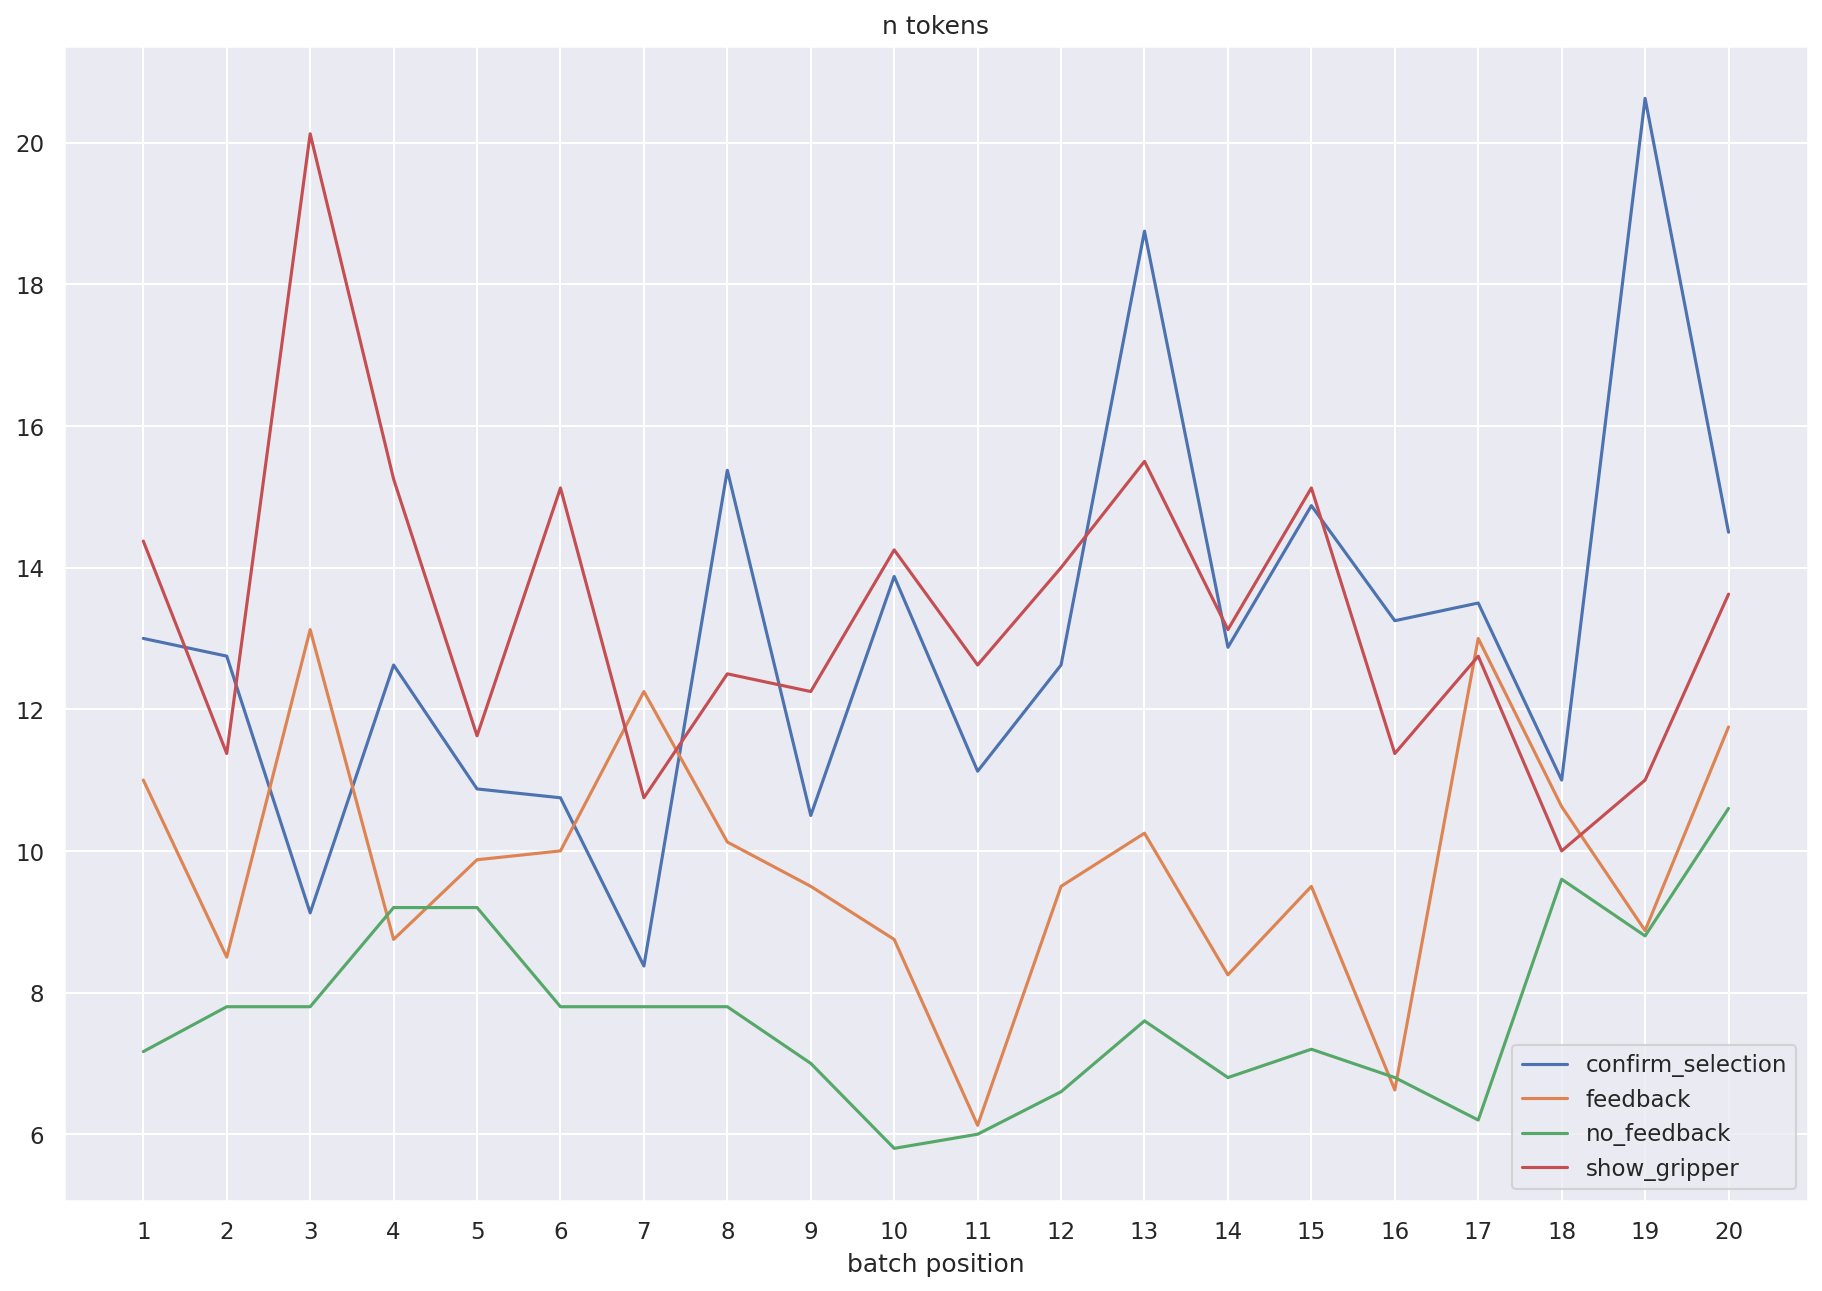

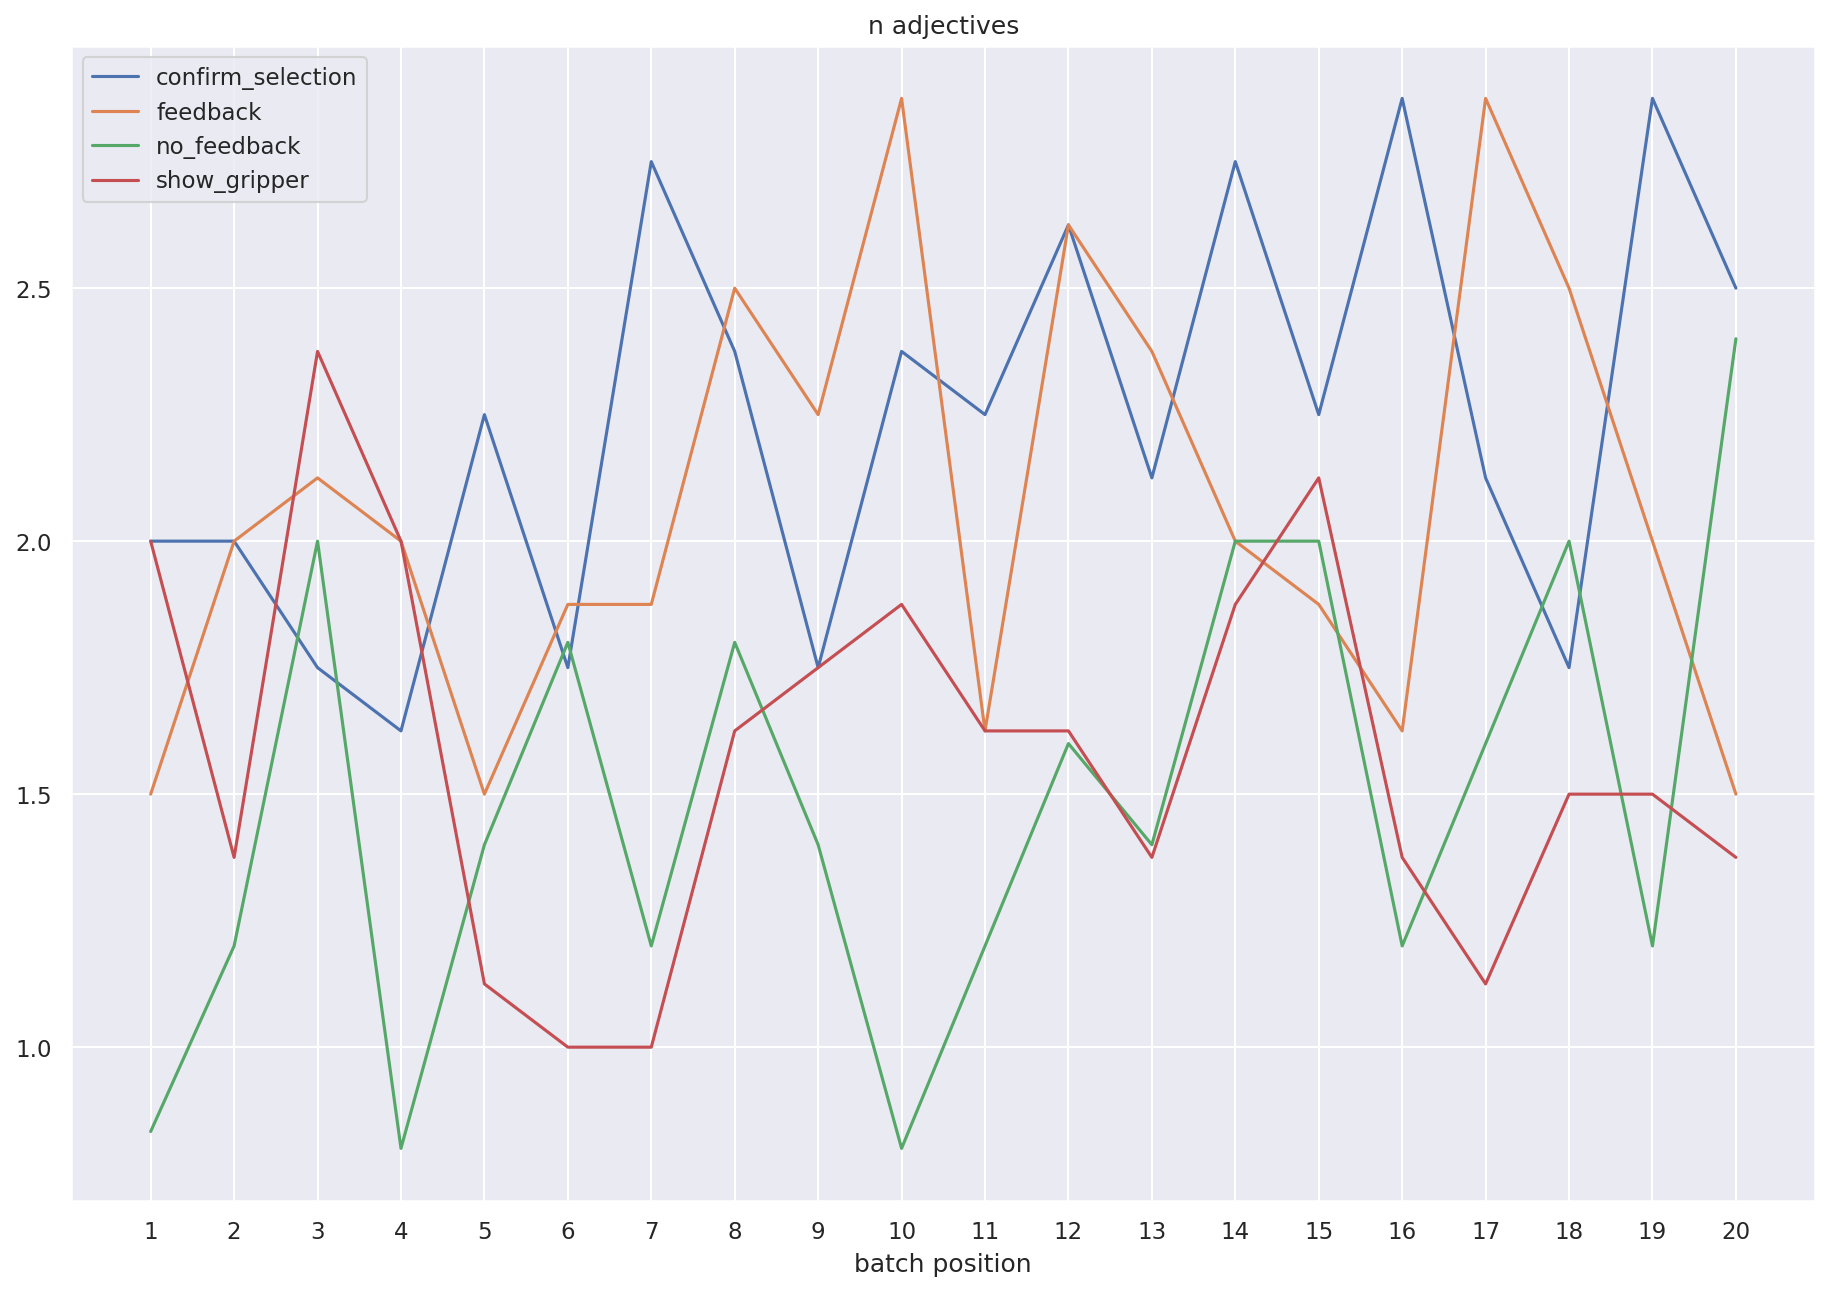

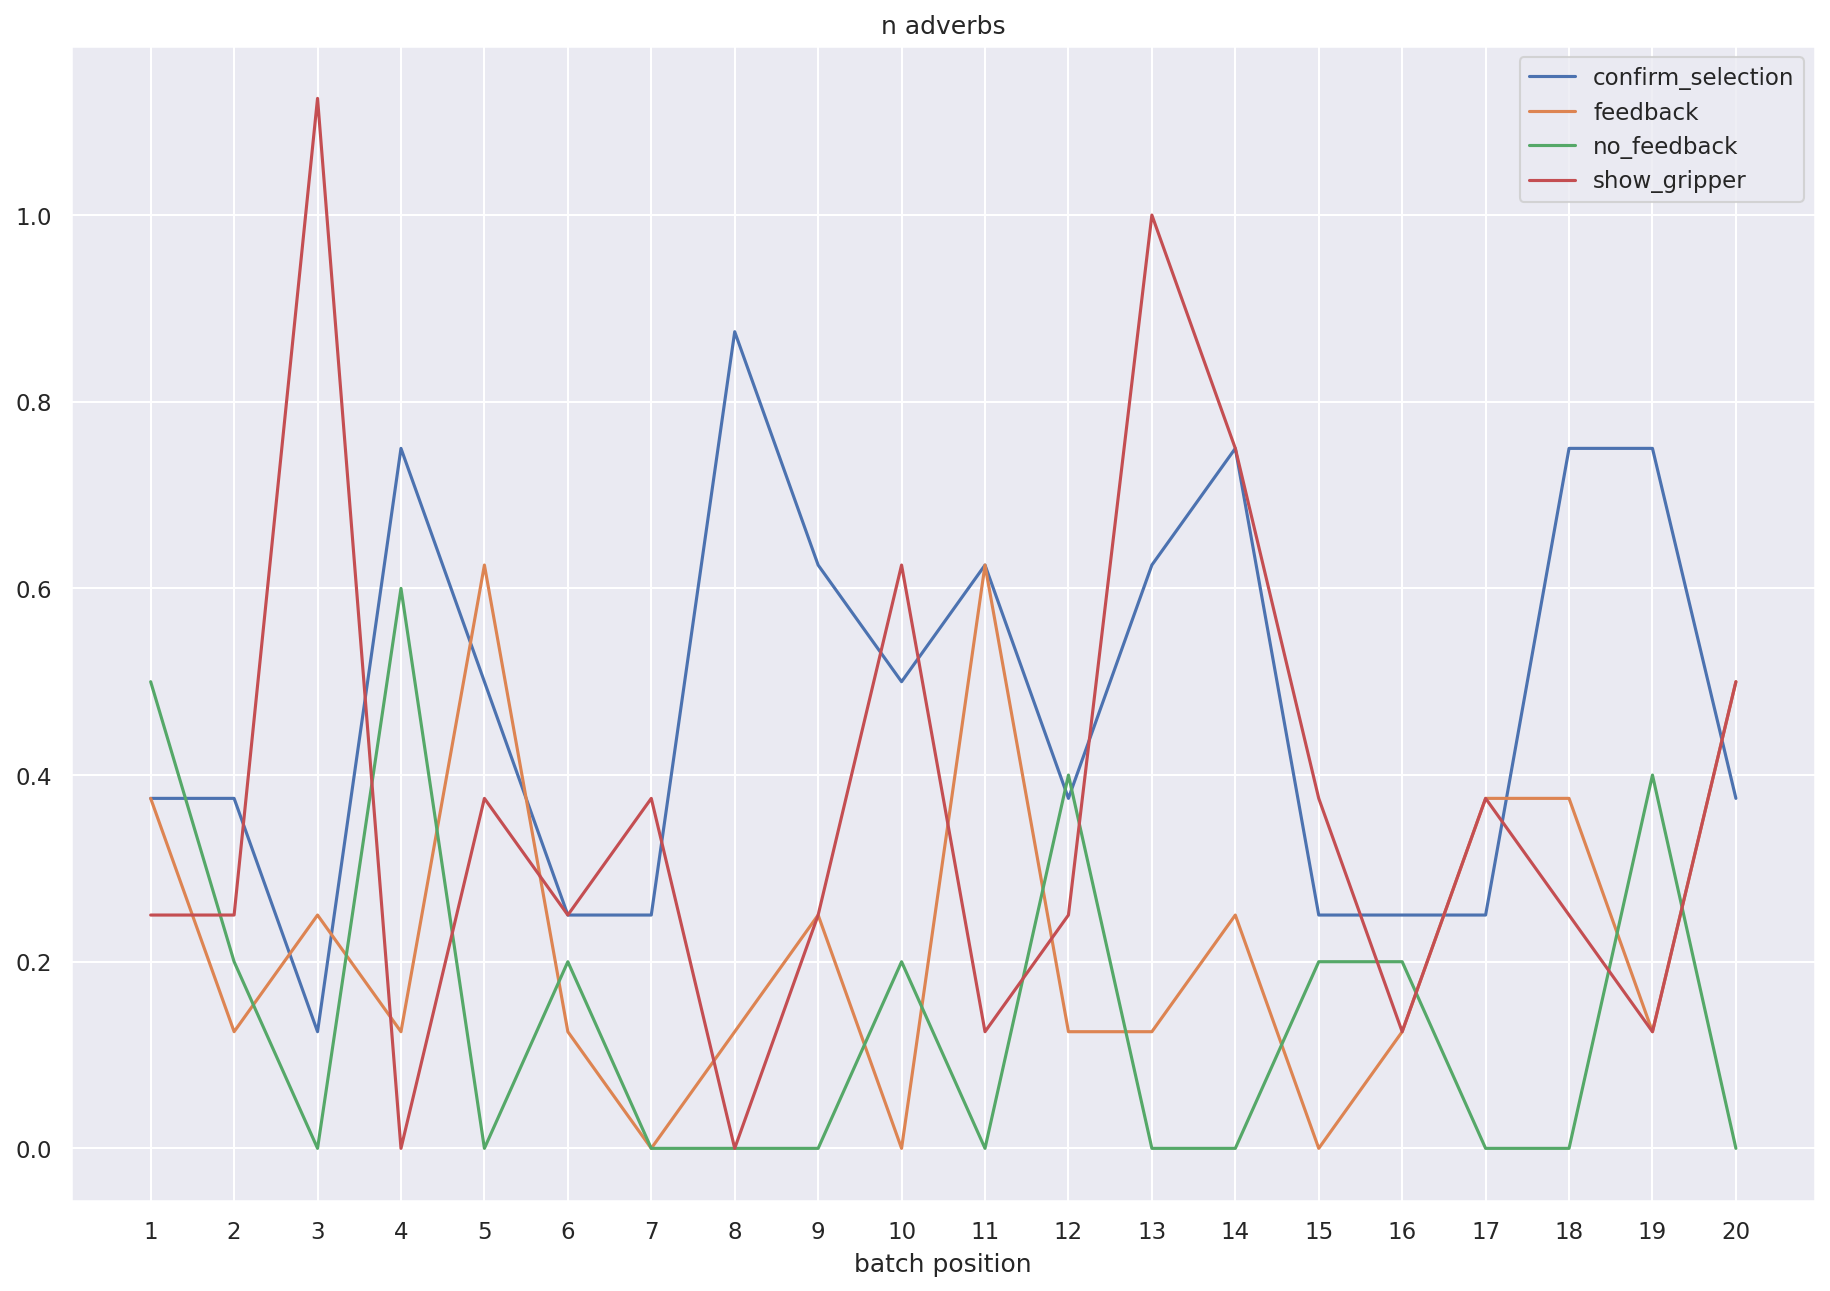

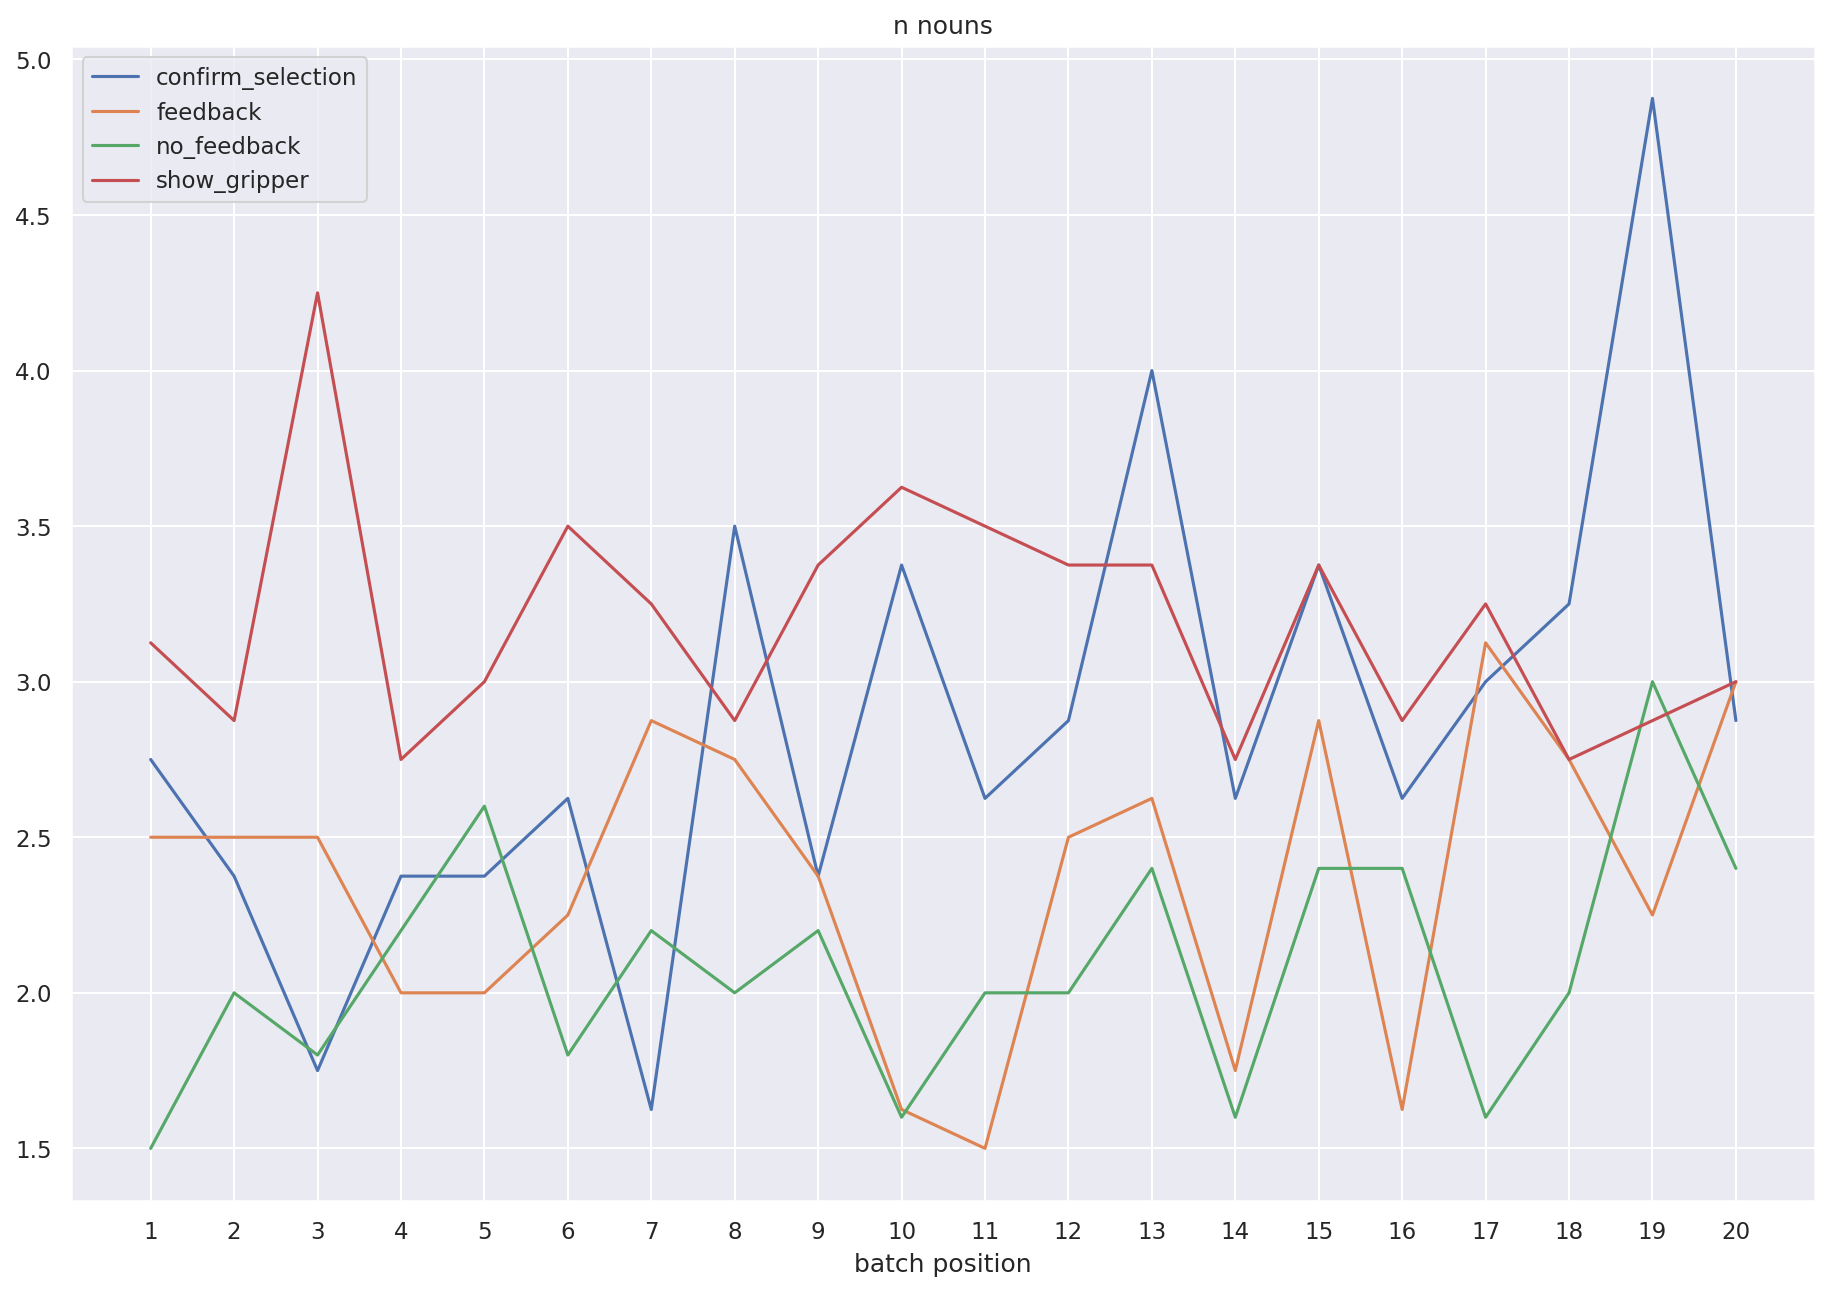

In [20]:
columns = [i for i in df.columns if i not in {"board id"}]

to_plot = ["accuracy", "lag to typing", "lag to description", "reaction time", "n tokens", "n adjectives", "n adverbs", "n nouns"]
for item in to_plot:
    figure(figsize=(15, 10), dpi=150)
    fig = sns.lineplot((
        df
        [(df["batch position"] < 21)]
        [columns]
        .groupby(["design", "batch position"])
        .mean(numeric_only=True)
    ).unstack(level=0)[item])#.plot(figsize=(10, 5), kind="line")
    
    fig.set_title(item)
    plt.xticks(list(range(1, 21)))
    
    for line in fig.lines:
        line.set_linestyle("-")
    
    leg = plt.legend()
    # get the individual lines inside legend and set line width
    for line in leg.get_lines():
        line.set_linestyle("-")
    plt.show()

## plot accuracy based on object type